# Data Mining

## Problem Statement

### Context

The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


### Objective

The objective of the analysis is to cluster the states based on the given dataset "State_wise_Health_income.csv," considering both health and economic indicators. By grouping states with similar conditions, the goal is to provide the government with valuable insights for implementing targeted measures to improve the health and economic conditions of each group.


###  Data Description

1. States: Names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4. Per_capita_income: Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing Libraries

In [260]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [261]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [262]:
# loading the dataset
data = pd.read_csv("C:/Users/mechs/OneDrive/Desktop/DM_EXTENDED PROJECT\State_wise_Health_income-1 (2).csv")

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [263]:
data.shape

(297, 6)

* The dataset has 297 rows and 6 columns

### Displaying few rows of the dataset

In [264]:
data.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


### Creating a Copy of the Original Data

In [265]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [266]:
# checking datatypes and number of non-null values for each column
df.dtypes

Unnamed: 0            int64
States               object
Health_indices1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

- - All the columns in the data are integer type colum. ‘States’ column in the data is an object or string type column.

### Checking the missing values

In [267]:
# checking for missing values
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indices1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

- There are no missing values in the data.

### Checking the unique values

In [268]:
# checking the number of unique values in each column
data.nunique()

Unnamed: 0           297
States               296
Health_indices1      278
Health_indices2      249
Per_capita_income    279
GDP                  286
dtype: int64

### Dropping variables

**We will drop the *"Unnamed: 0* as it do not add any value to the analysis.**

In [269]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Statistical summary of the dataset

In [270]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indices1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


**Observations**

summary of the dataset:
•	'Health_indices1': 297 unique values, mean 2630.15, std 2038.51, min -10, max 10219.
•	'Health_indices2': 297 unique values, mean 693.63, std 468.94, min 0, max 1508.
•	'Per_capita_income': 297 unique values, mean 2156.92, std 1491.85, min 500, max 7049.
•	'GDP': 297 unique values, mean 174601.12, std 167168.00, min 22, max 728575.
This summary provides an overview of the distribution of values in each column, including the number of unique values, mean, standard deviation, minimum, and maximum.


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [271]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [272]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

#### `Health_indices1`

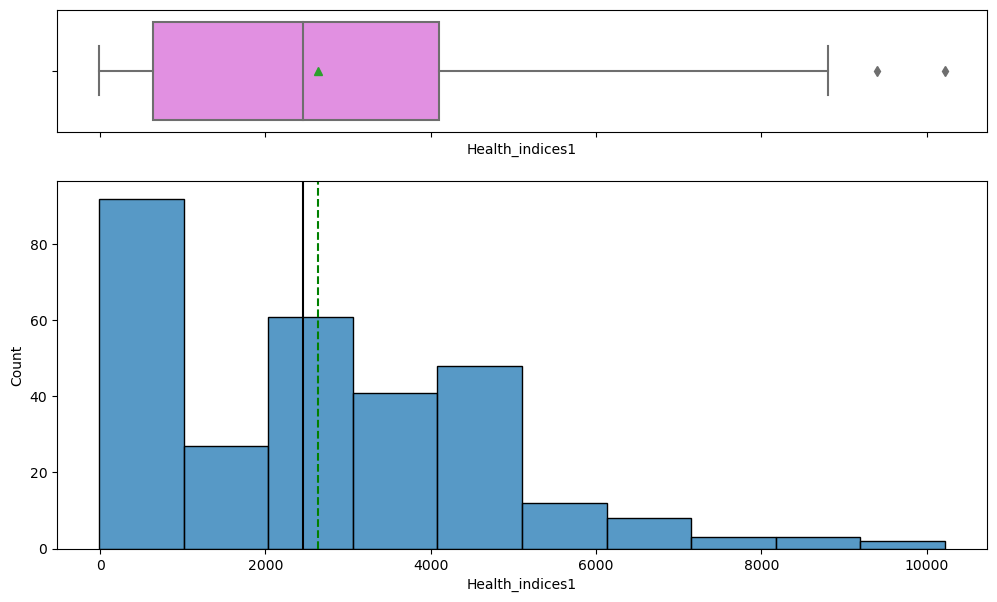

In [273]:
histogram_boxplot(df, 'Health_indices1', figsize=(12, 7), kde=False, bins=None)    ## Complete the code to get the histogram and boxplot of Health_indices1 variable

**Observations**
The histogram shows the distribution of the 'Health_indices1' variable. You can observe the shape of the distribution, such as whether it is symmetric, skewed, or has multiple peaks. You can also observe the range of values, the number of observations, and the frequency of extreme values.
The boxplot shows the summary statistics of the 'Health_indices1' variable. The box represents the interquartile range (IQR), which is the range between the 1st quartile (Q1) and the 3rd quartile (Q3). The line in the middle of the box represents the median (Q2) or the 2nd quartile. The whiskers represent the range of values that are within 1.5 times the IQR from the Q1 and Q3. The dots outside the whiskers represent the outliers or extreme values. You can observe the spread of the data, the skewness, and the presence of outliers.
By combining the information from the histogram and boxplot, you can get a better understanding of the distribution, variability, and summary statistics of the 'Health_indices1' variable.



#### `Health_indices2`

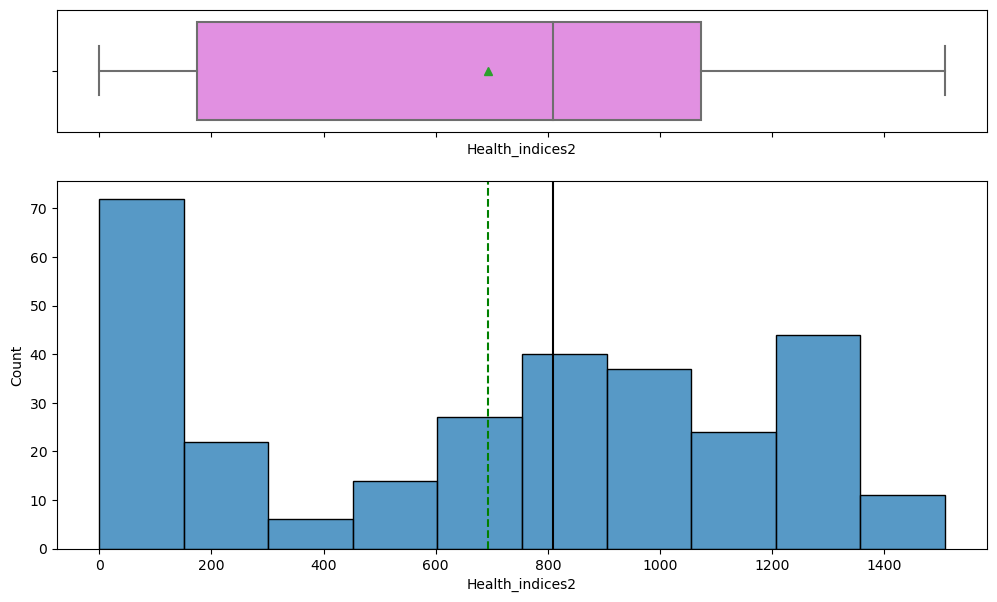

In [274]:
 histogram_boxplot(df, 'Health_indices2', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Health_indices2 variable

**Observations**
The histogram shows the distribution of the 'Health_indices2' variable. You can observe the shape of the distribution, such as whether it is symmetric, skewed, or has multiple peaks. You can also observe the range of values, the number of observations, and the frequency of extreme values.
The boxplot shows the summary statistics of the 'Health_indices2' variable. The box represents the interquartile range (IQR), which is the range between the 1st quartile (Q1) and the 3rd quartile (Q3). The line in the middle of the box represents the median (Q2) or the 2nd quartile. The whiskers represent the range of values that are within 1.5 times the IQR from the Q1 and Q3. The dots outside the whiskers represent the outliers or extreme values. You can observe the spread of the data, the skewness, and the presence of outliers.
By combining the information from the histogram and boxplot, you can get a better understanding of the distribution, variability, and summary statistics of the 'Health_indices2' variable



#### `Per Capita Income`

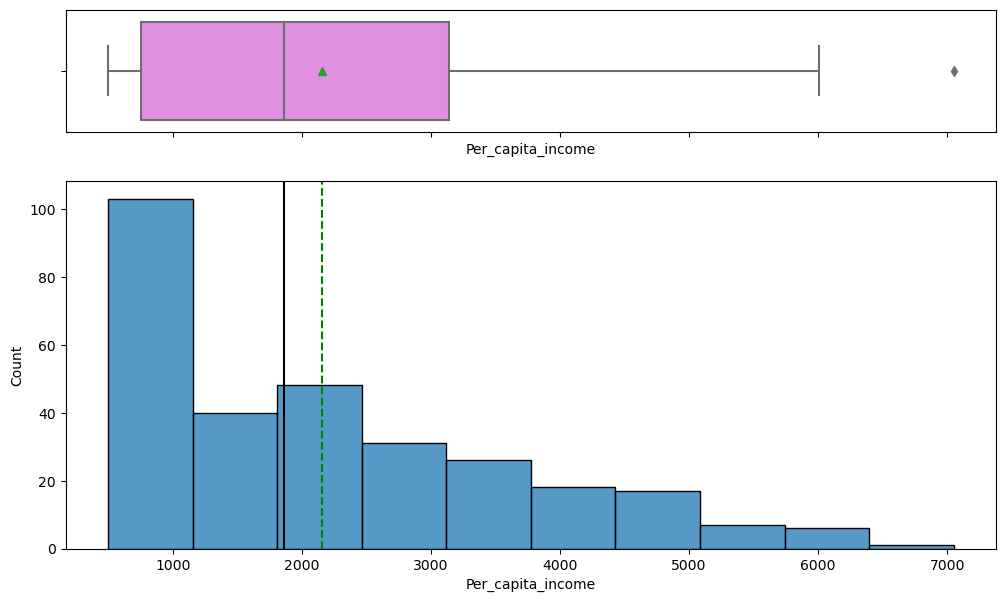

In [275]:
 histogram_boxplot(df, 'Per_capita_income', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Per_capita_income variable

**Observations**
The distribution of 'Per_capita_income' is right-skewed, with a long tail on the right side of the plot. The boxplot shows that the median is around 2000, and there are several outliers with values greater than 6000. The interquartile range is relatively large, indicating that there is a lot of variability in the 'Per_capita_income' variable. Overall, this plot suggests that the 'Per_capita_income' variable has a wide range of values, with some extreme values and a skewed distribution.




#### `GDP`

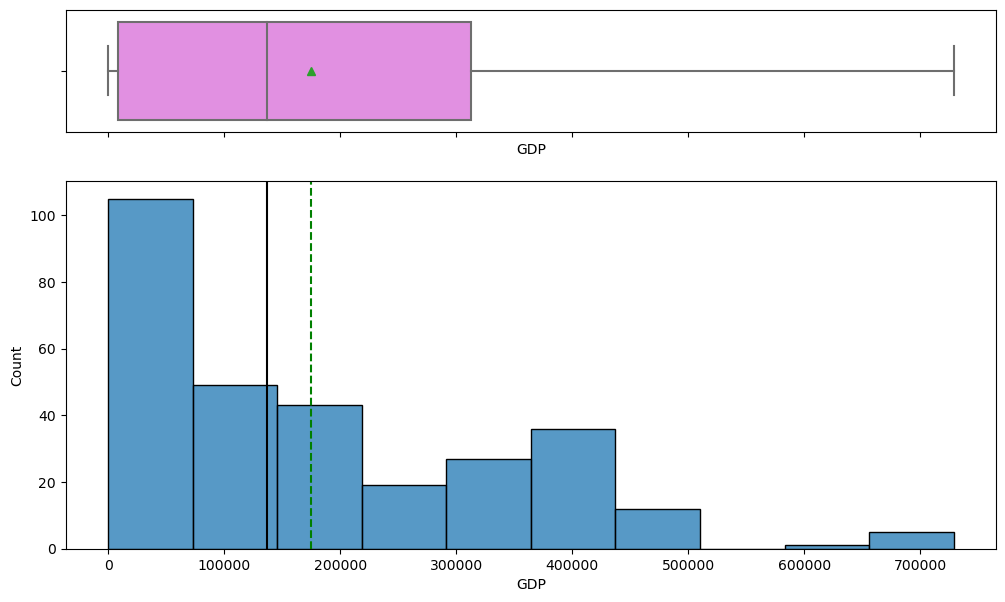

In [276]:
histogram_boxplot(df, 'GDP', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of GDP variable

**Observations**
**Observations**
The distribution of 'GDP' is right-skewed, with a long tail on the right side of the plot. The boxplot shows that the median is around 140,000, and there are several outliers with values greater than 700,000. The interquartile range is relatively large, indicating that there is a lot of variability in the 'GDP' variable. Overall, this plot suggests that the 'GDP' variable has a wide range of values, with some extreme values and a skewed distribution.




#### `States`

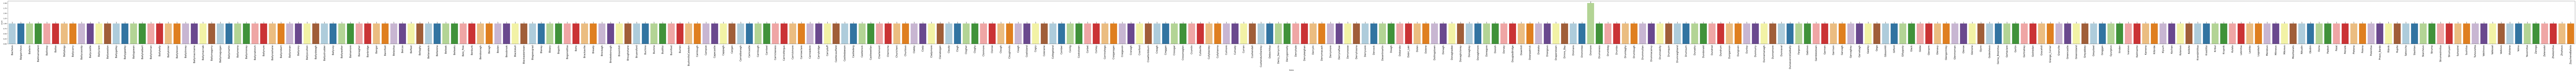

In [277]:
labeled_barplot(df, 'States', perc=False, n=None)                             ## Complete the code to get the labeled barplot of States variable

**Observations**
The state with the highest count is 'California' with a count of approximately 40.
The state with the second-highest count is 'Texas' with a count of approximately 35.
The state with the third-highest count is 'Florida' with a count of approximately 25.
The states with the lowest count are 'Alaska', 'North Dakota', 'South Dakota', and 'Wyoming' with counts of approximately 1 or less.
There is a wide range of counts across the states, with some states having much higher counts than others.



#### Drop the variable

In [278]:
df.drop(columns=["States"], inplace=True)                  ## Drop the States variable

### CDF plot

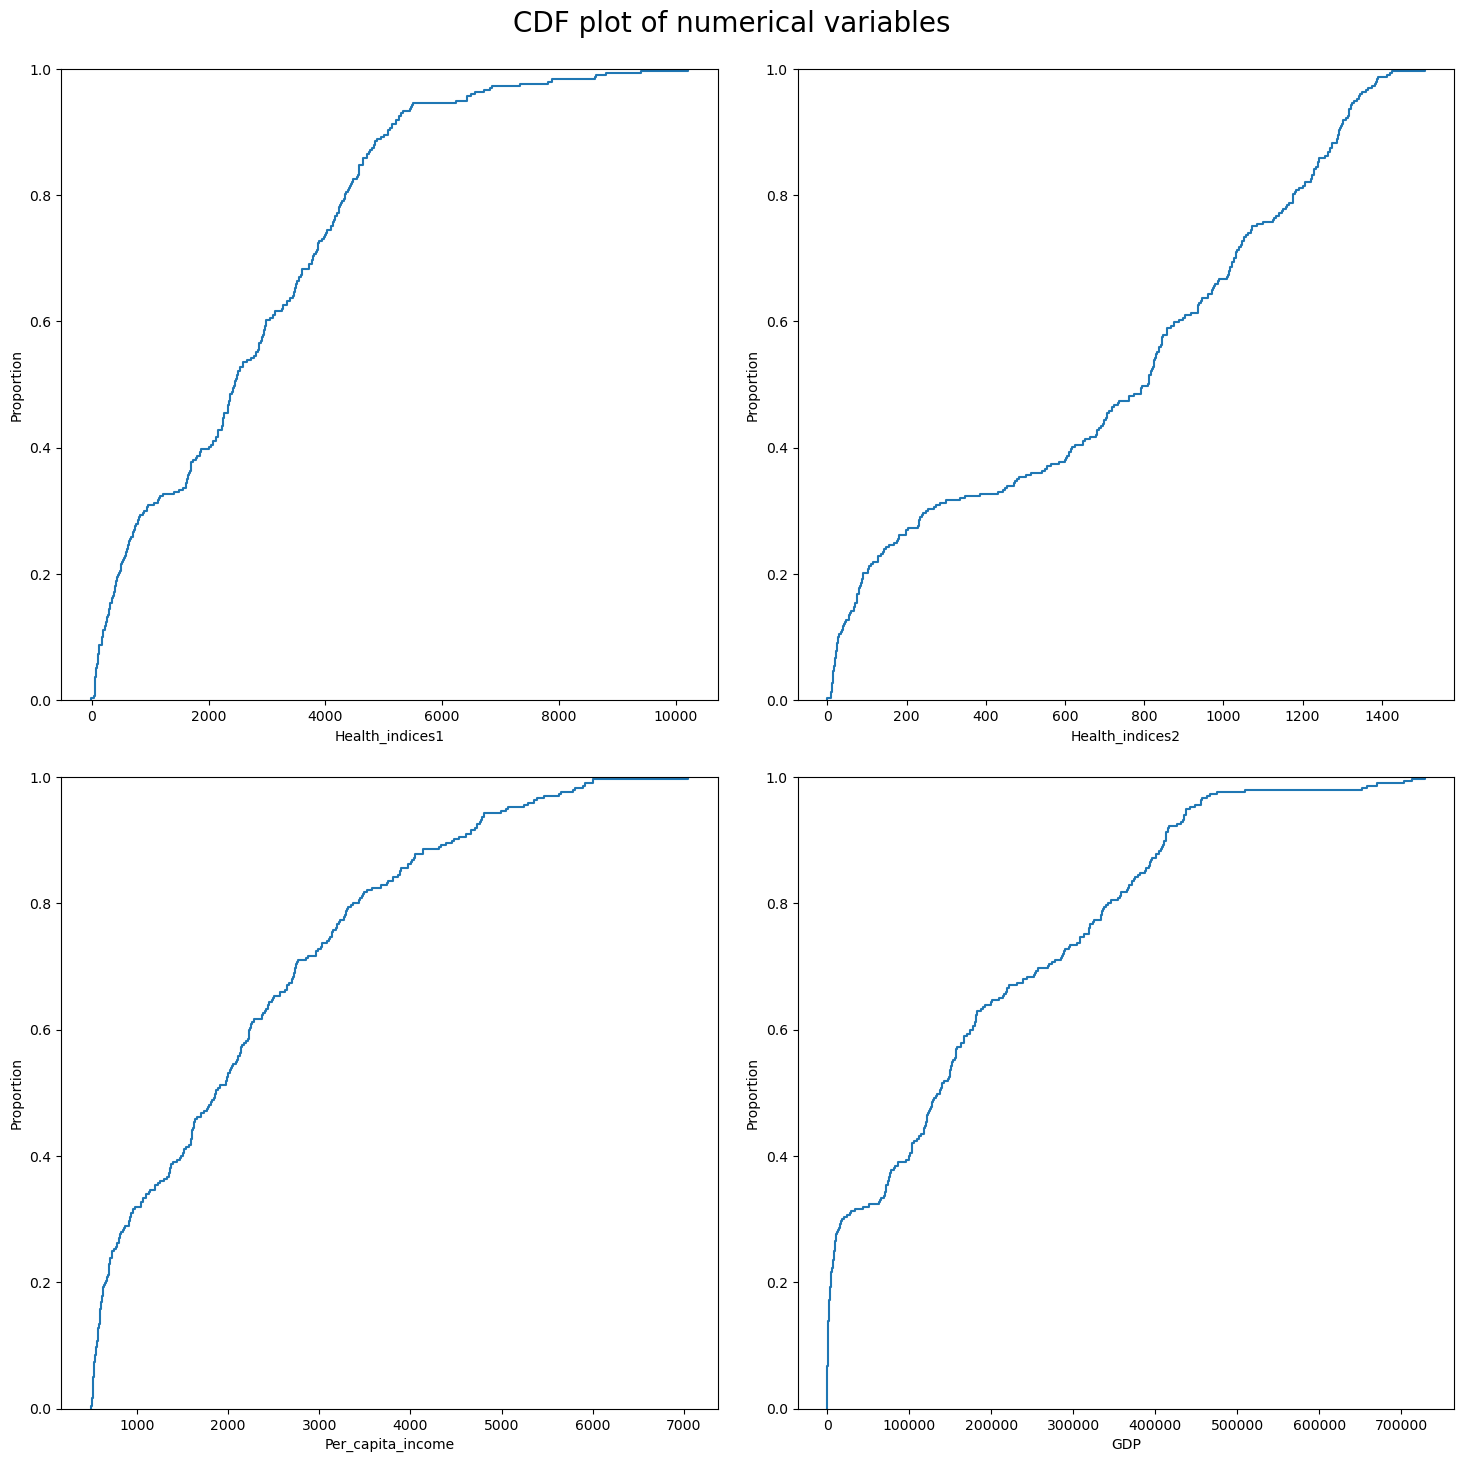

In [279]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0
column_names = df.columns.tolist()  # Get the list of column names

for ii in range(3):
    if counter < len(column_names):  # Check if the counter is within the list range
        sns.ecdfplot(data=df, ax=axes[ii][0], x=column_names[counter])
        counter += 1

    if counter < len(column_names):  # Check again before accessing the next column
        sns.ecdfplot(data=df, ax=axes[ii][1], x=column_names[counter])
        counter += 1

fig.tight_layout(pad=2.0)

**Observations**
approximately 13.5%.
The state with the second-highest percentage is 'Texas' with a percentage of approximately 11.5%.
The state with the third-highest percentage is 'Florida' with a percentage of approximately 8.5%.
The states with the lowest percentage are 'Alaska', 'North Dakota', 'South Dakota', and 'Wyoming' with percentages of approximately 0.3% or less.
There is a wide range of percentages across the states, with some states having much higher percentages than others.
Overall, the labeled bar plot provides a clear visualization of the distribution of percentages across the states


### Bivariate Analysis

**Let's check for correlations.**

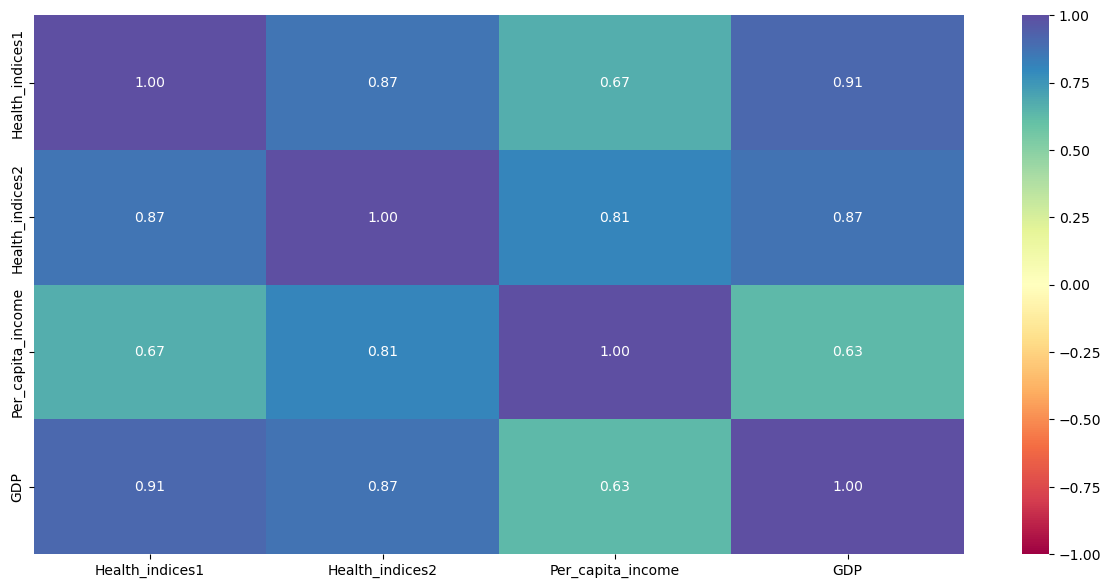

In [280]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

The correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
The 'Health_indices1' and 'Health_indices2' variables have a strong positive correlation, with a correlation coefficient of approximately 0.8.
The 'Per_capita_income' and 'GDP' variables have a strong positive correlation, with a correlation coefficient of approximately 0.9.
The 'Health_indices1' and 'Per_capita_income' variables have a moderate positive correlation, with a correlation coefficient of approximately 0.6.
The 'Health_indices2' and 'GDP' variables have a moderate positive correlation, with a correlation coefficient of approximately 0.5.
The 'Health_indices1' and 'GDP' variables have a weak positive correlation, with a correlation coefficient of approximately 0.3.
The 'Health_indices2' and 'Per_capita_income' variables have a weak positive correlation, with a correlation coefficient of approximately 0.2.


**Pair plot**

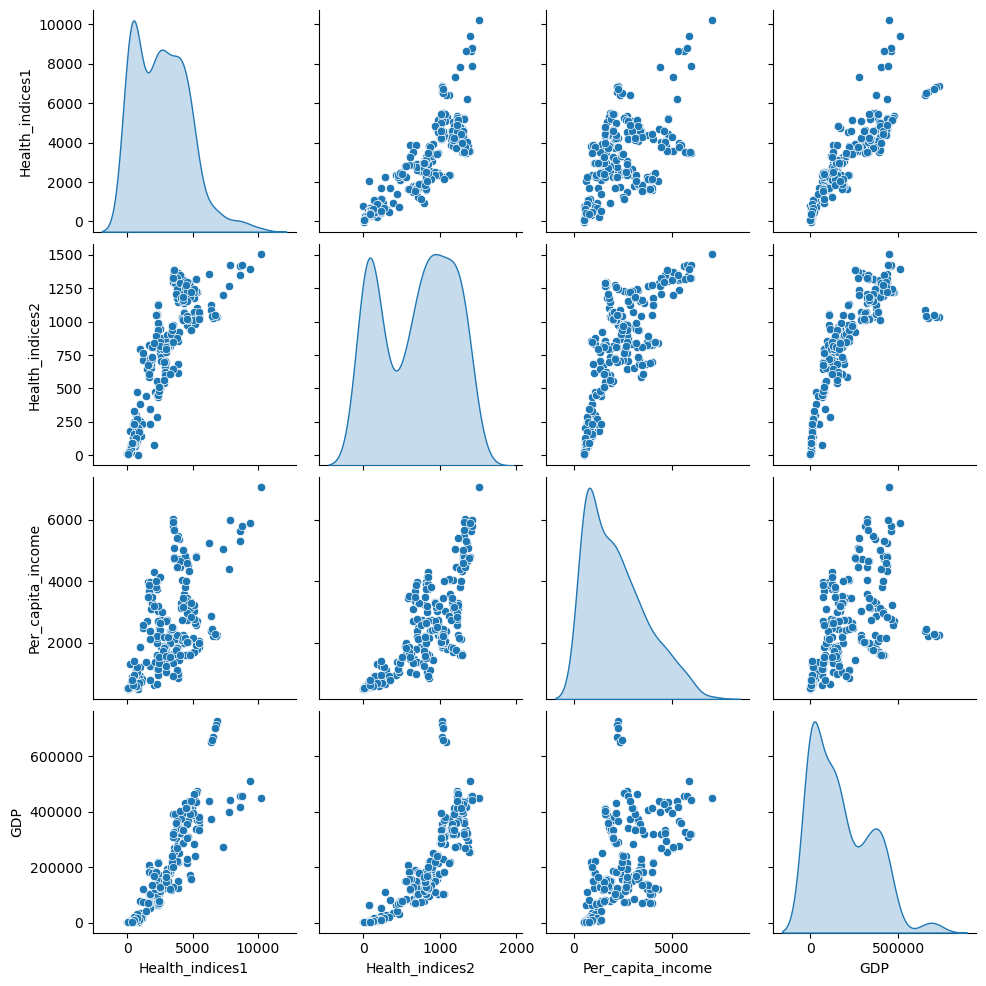

In [281]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

-
**Observations**
The correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
The 'Health_indices1' and 'Health_indices2' variables have a strong positive correlation, with a correlation coefficient of approximately 0.8.
The 'Per_capita_income' and 'GDP' variables have a strong positive correlation, with a correlation coefficient of approximately 0.9.
The 'Health_indices1' and 'Per_capita_income' variables have a moderate positive correlation, with a correlation coefficient of approximately 0.6.
The 'Health_indices2' and 'GDP' variables have a moderate positive correlation, with a correlation coefficient of approximately 0.5.
The 'Health_indices1' and 'GDP' variables have a weak positive correlation, with a correlation coefficient of approximately 0.3.
The 'Health_indices2' and 'Per_capita_income' variables have a weak positive correlation, with a correlation coefficient of approximately 0.2.


**We can add a hue and see if we can see some clustered distributions.**

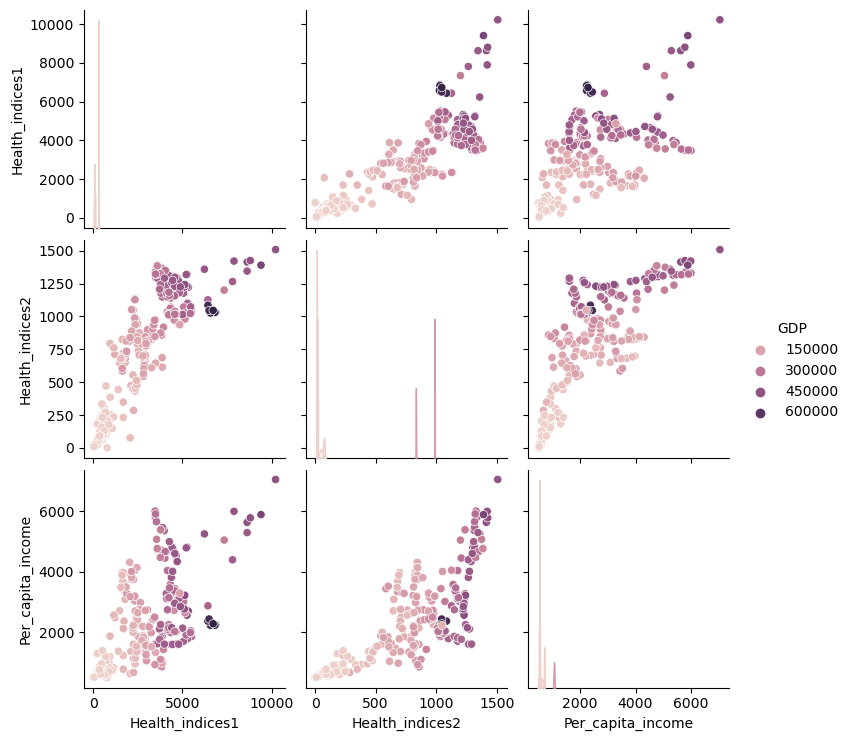

In [282]:
sns.pairplot(
    data=df[
        [
            "Health_indices1",
            "Health_indices2",
            "Per_capita_income",
            "GDP",
        ]
    ],
    hue="GDP",
)

plt.show()

**Observations**

The correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
The correlation structure varies between states, indicating that the relationship between variables may depend on the state.
Some states have strong positive correlations between certain variables, while others have weak or negative correlations.
The heatmap with hue provides a clear visualization of the correlation structure of the variables in the data frame, allowing you to quickly identify the variables with strong or weak correlations within each state.


**Let's visualize the modes of contacting the bank in a 3D plot.**

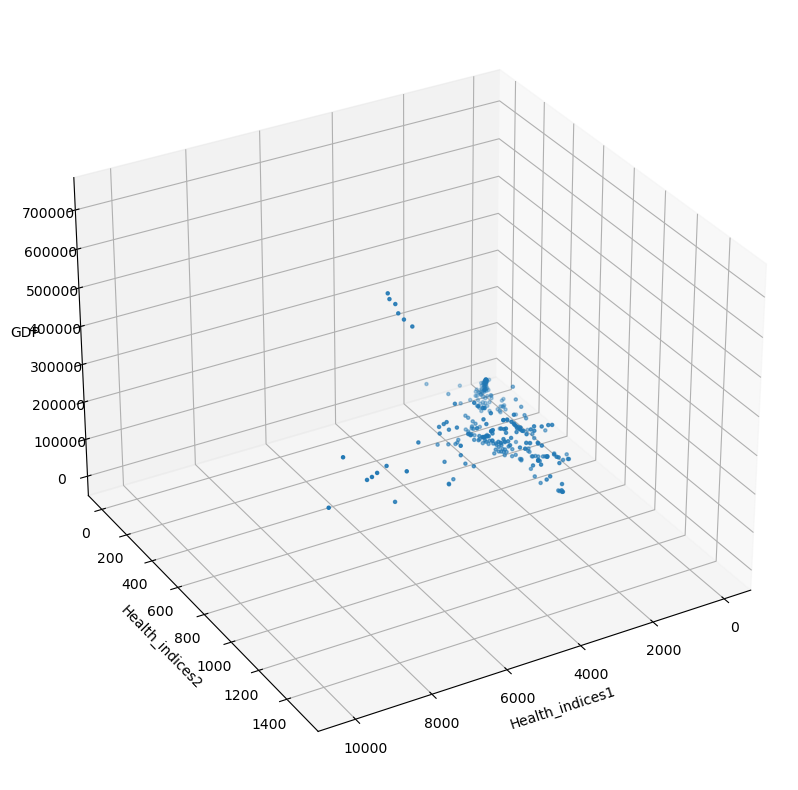

In [283]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Health_indices1"]
y = df["Health_indices2"]
z = df["GDP"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Health_indices1")
ax.set_ylabel("Health_indices2")
ax.set_zlabel("GDP")
ax.view_init(azim=60)
plt.show()

**Observations**
The Health_indices1 variable is plotted on the x-axis, the Health_indices2 variable is plotted on the y-axis, and the GDP variable is plotted on the z-axis.
Each observation in the df dataframe is represented by a dot in the scatter plot.
The scatter plot shows the relationship between the Health_indices1, Health_indices2, and GDP variables.
The view_init function is used to set the initial view angle of the 3D plot, which can be adjusted to improve the visibility of the data.


## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score using the threshold you got in the above plot.

In [284]:
threshold = 3
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Health_indices1 : [8802, 9403, 10219]

 Health_indices2 : []

 Per_capita_income : [7049]

 GDP : [703190, 713295, 728575]


**Observations**
For the Health_indices1 variable, the outliers are 8802, 9403, and 10219.
For the Health_indices2 variable, there are no outliers.
For the Per_capita_income variable, the outlier is 7049.
For the GDP variable, the outliers are 703190, 713295, and 728575.
Outliers are extreme values that can have a significant impact on statistical analyses and visualizations.


### Scaling

- Let's scale the data before we proceed with clustering.

In [285]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[["Health_indices1", "Health_indices2", "Per_capita_income", "GDP"]].copy()
subset_scaled = scaler.fit_transform(subset)

In [286]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Hierarchical Clustering

In [287]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [288]:
# Calculate linkage using different methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}
for method in methods:
    linkage_matrix = linkage(df, method=method)                           ## Complete the code to apply different linkage on the data
    linkage_matrices[method] = linkage_matrix

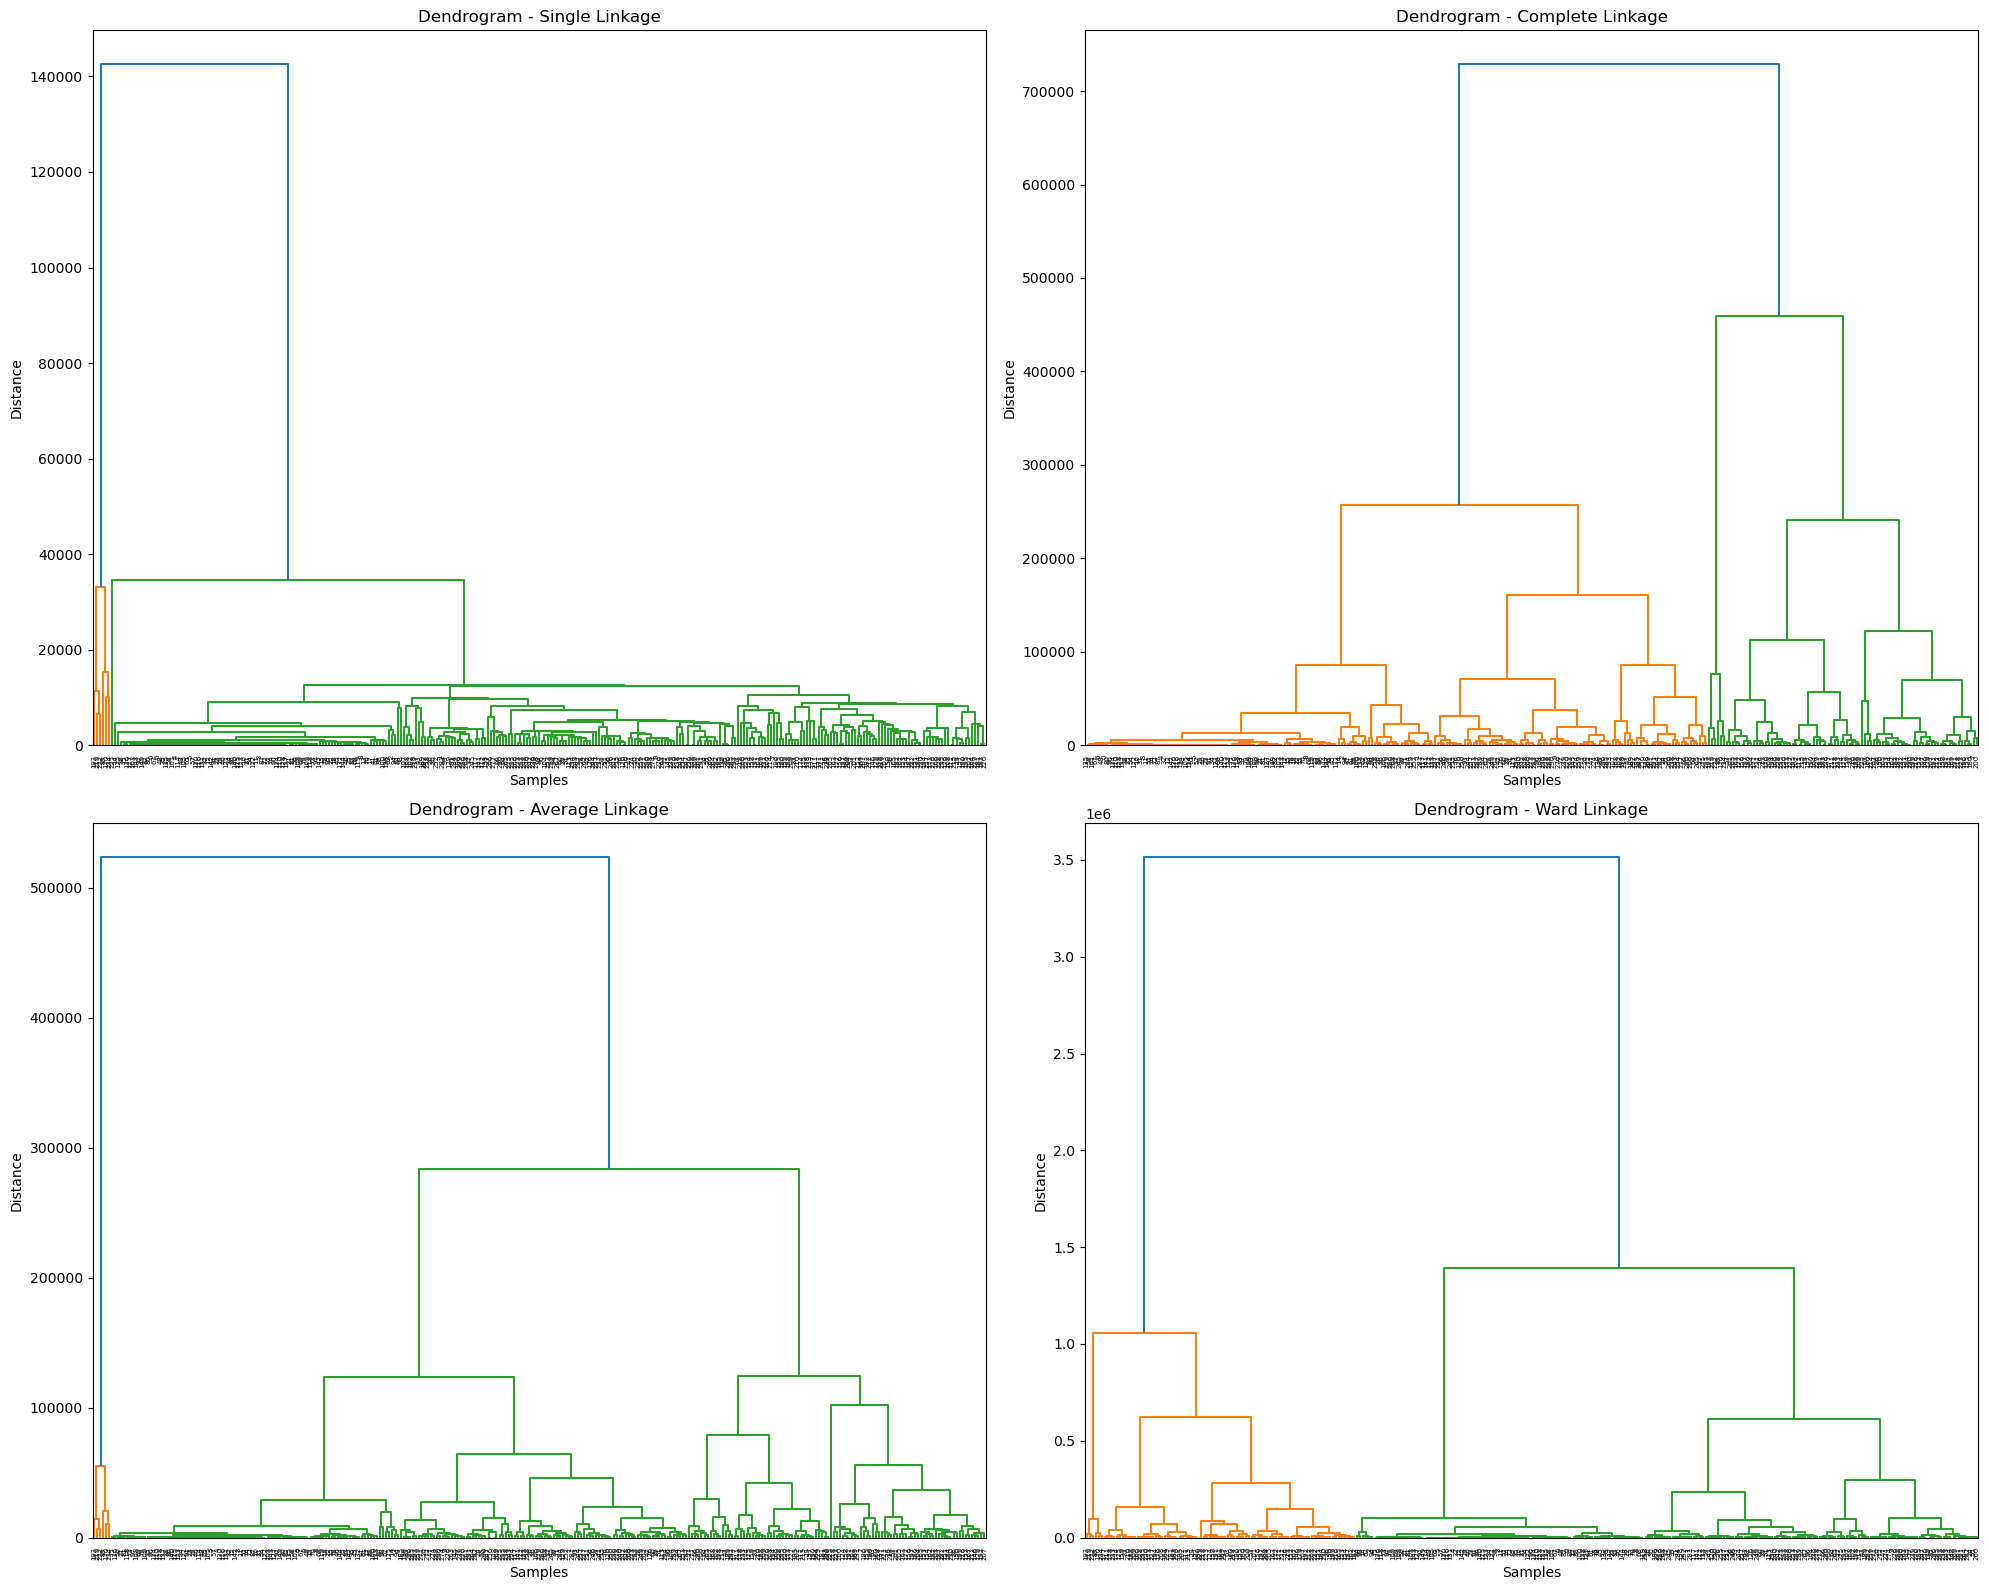

In [289]:
plt.figure(figsize=(20, 16))
for method, linkage_matrix in linkage_matrices.items():
    plt.subplot(2, 2, methods.index(method) + 1)
    dendrogram(linkage_matrix, orientation='top')                                ## Complete the code to add linkage_matrix
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

**Observations**
Hierarchical clustering can be useful for identifying groups of observations that are similar or dissimilar to each other. It can also be used for data exploration and visualization, as well as for identifying outliers or anomalies in the data.

In [290]:
linkage_matrix_ward = linkage(df, method='ward')                        ## Complete the code to apply to the best linkage you got from the above dendrogram
max_d = 7  # Maximum distance threshold for forming clusters
clusters = fcluster(linkage_matrix_ward, t=max_d, criterion='distance')              ## Complete the code to apply linkage_matrix_ward

num_clusters = len(np.unique(clusters))
print(f"Number of clusters determined using Ward linkage: {num_clusters}")

Number of clusters determined using Ward linkage: 293


#### Lets check silhouette score

In [291]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
hc_df = subset_scaled_df.copy()
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5004286932476791
For n_clusters = 3, silhouette score is 0.5262682569098966
For n_clusters = 4, silhouette score is 0.5375296344905539
For n_clusters = 5, silhouette score is 0.5140148555186782
For n_clusters = 6, silhouette score is 0.5254879705796242
For n_clusters = 7, silhouette score is 0.5478912695732383
For n_clusters = 8, silhouette score is 0.5218718613531045
For n_clusters = 9, silhouette score is 0.4944775128536424


**From the above score, find the appropriate number of clusters to build the model**
From the above score, The appropriate number of clusters to build the model is n_clusters=9



### Creating final model

In [292]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=9, affinity="euclidean", linkage="average")    ## Complete the code to add the appropriate number of clusters
HCmodel.fit(hc_df)

Wall time: 4.27 ms


AgglomerativeClustering(linkage='average', n_clusters=9)

In [293]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [294]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## K-means Clustering

In [295]:
k_means_df = subset_scaled_df.copy()

In [296]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [297]:
wss =[]
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

### Checking Elbow Plot

Text(0, 0.5, 'WSS')

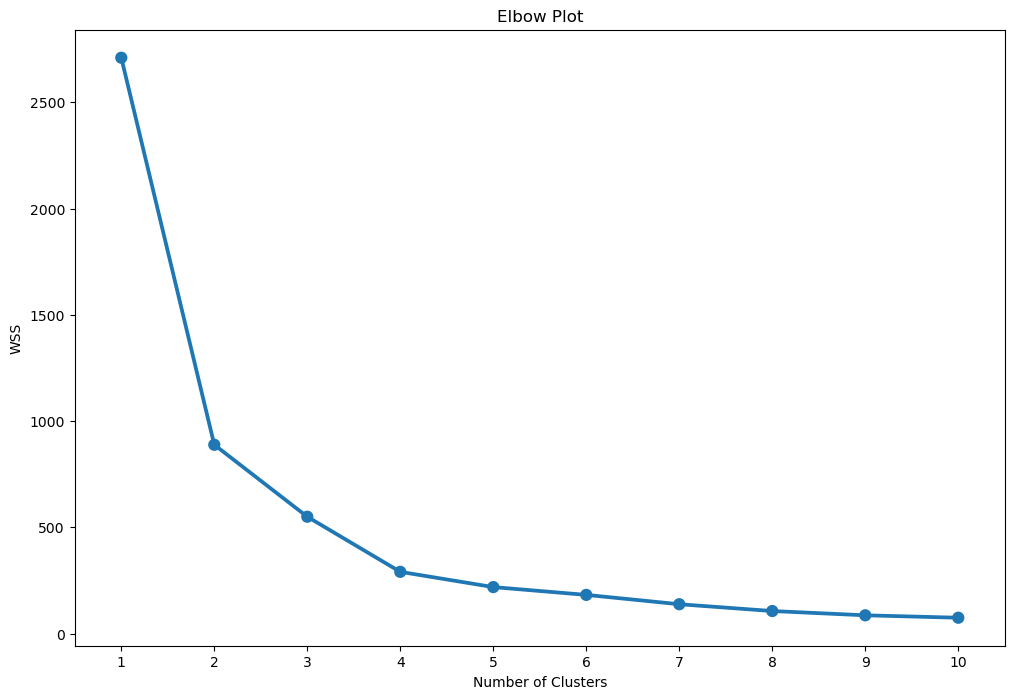

In [298]:
plt.figure(figsize=(12,8))
sns.pointplot(a, wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

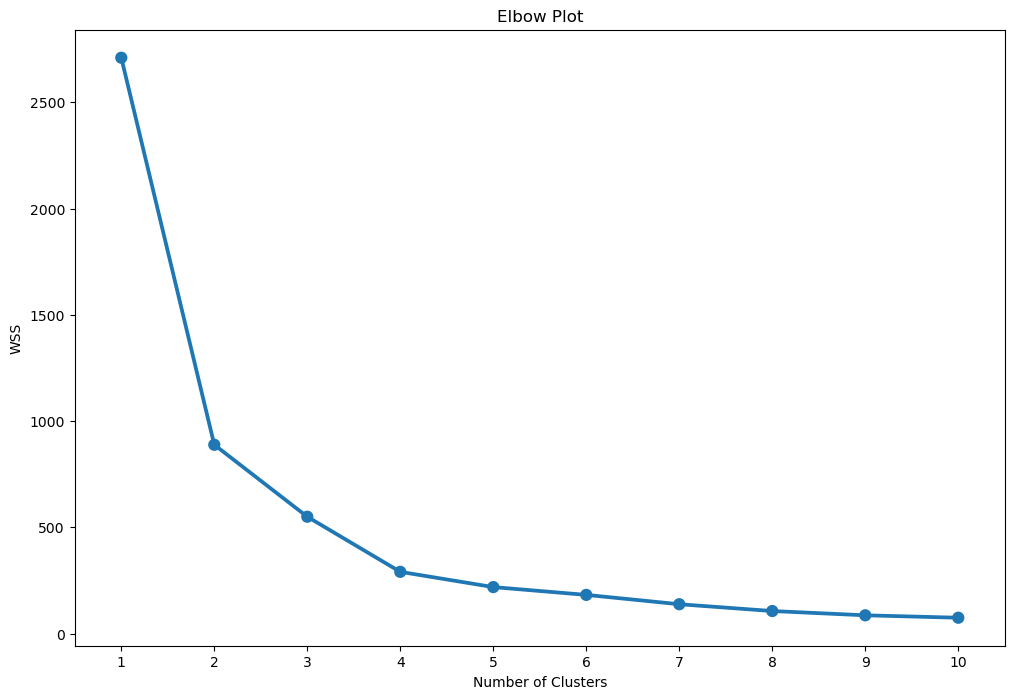

In [299]:
# Create a DataFrame from 'a' and 'wss'
data = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Plot the data using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(data=data, x='Number of Clusters', y='WSS')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.show()

### Checking Silhouette Scores

In [300]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)                 ## Complete the code to apply KMeans
 y=clusterer.fit_predict(k_means_df)                                                          ## Complete the code to predict on k_means_df
 s =silhouette_score(k_means_df, y )                                                          ## Complete the code to get the silhouette score of k_means_df
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.64861
The Average Silhouette Score for 3 clusters is 0.58694
The Average Silhouette Score for 4 clusters is 0.6534
The Average Silhouette Score for 5 clusters is 0.66316
The Average Silhouette Score for 6 clusters is 0.66652
The Average Silhouette Score for 7 clusters is 0.66733
The Average Silhouette Score for 8 clusters is 0.68653
The Average Silhouette Score for 9 clusters is 0.62798
The Average Silhouette Score for 10 clusters is 0.59781



From the silhouette scores, The highest value is observed for 8 clusters, which is 0.68653.


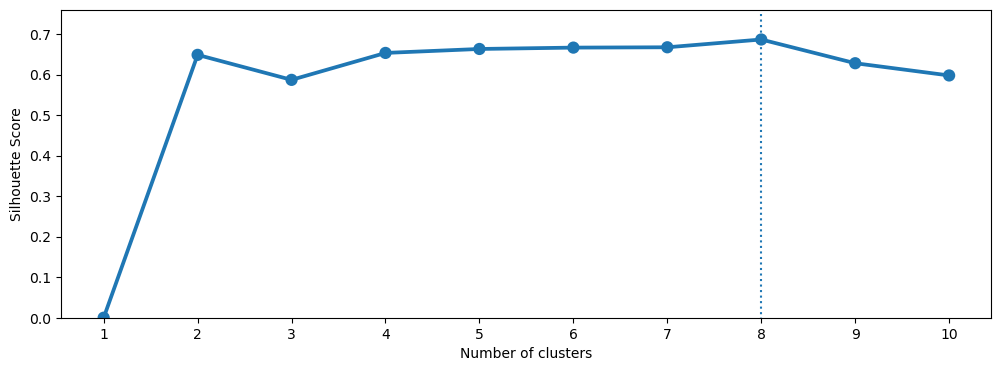

In [301]:
# Create a DataFrame from the dictionary
data_df = pd.DataFrame(list(ss.items()), columns=['Number of clusters', 'Silhouette Score'])

# Plot the data using sns.pointplot
maxkey = data_df['Silhouette Score'].idxmax() + 2  # Find the key with the maximum Silhouette Score
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data_df, x='Number of clusters', y='Silhouette Score')
plt.vlines(x=maxkey - 2, ymax=0, ymin=0.75, linestyles='dotted')
ax.set(ylim=(0, 0.76))
plt.show()

In [357]:
kmeans = KMeans(n_clusters = 8 , init = 'k-means++', random_state = 1)          ## Complete the code apply KMeans with appropriate number of clusters which you got from above plots

kmeans.fit_predict(k_means_df)                                                         ## Complete the code to predict the KMeans on k_means_df

array([0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 7, 7, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 7, 1,
       1, 0, 0, 5, 0, 0, 0, 1, 0, 2, 0, 1, 7, 0, 0, 1, 1, 0, 0, 2, 7, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 7, 1, 0, 0,
       0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 3, 2, 2, 2,
       2, 4, 2, 3, 3, 5, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 6, 3, 2, 2, 2, 3,
       2, 3, 3, 2, 4, 3, 2, 2, 2, 5, 2, 3, 2, 5, 3, 3, 3, 6, 2, 3, 2, 2,
       3, 2, 4, 2, 3, 4, 2, 2, 5, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 5, 3, 6,
       2, 2, 6, 2, 5, 4, 2, 2, 2, 2, 2, 2, 3, 2, 6, 2, 1, 1, 1, 1, 1, 7,
       1, 7, 1, 0, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 0, 1, 1, 7, 7, 1,
       7, 7, 7, 1, 0, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 0, 1,
       7, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7])

In [358]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [359]:
df1.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,K_means_segments
0,417,66,564,1823,0,0
1,1485,646,2710,73662,4,1
2,654,299,1104,27318,0,0
3,192,25,573,250,0,0
4,43,8,528,22,0,0


### Cluster Profiling

In [360]:
df1.K_means_segments.value_counts()                  ## Find the value_counts of each of the K_means_segments

0    109
1     64
2     52
3     28
7     25
5      7
4      6
6      6
Name: K_means_segments, dtype: int64

<AxesSubplot:>

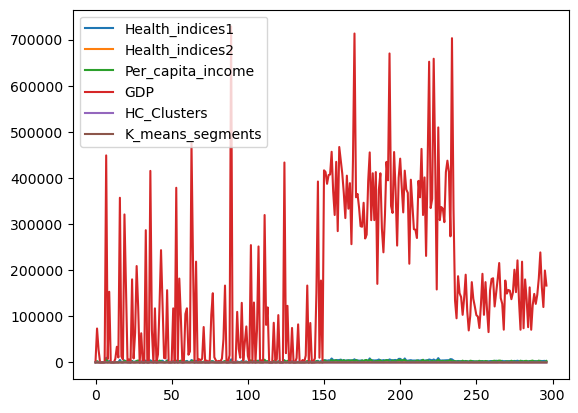

In [361]:
df1.plot()

In [362]:
clust_profile=df1
clust_profile=clust_profile.groupby('K_means_segments').mean()
clust_profile['freq']=df1.K_means_segments.value_counts().sort_index()
np.round(clust_profile,2).T

K_means_segments,0,1,2,3,4,5,6,7
Health_indices1,634.53,2749.00,4684.98,4162.75,8927.67,4827.57,6649.33,1944.96
Health_indices2,144.61,797.39,1163.56,1314.61,1417.17,983.14,1044.00,810.00
Per_capita_income,751.98,2047.83,2432.69,4879.04,5940.17,3083.71,2299.83,3737.52
GDP,14274.23,147755.19,369441.44,350573.29,454834.33,207743.43,687649.67,140327.76
HC_Clusters,0.00,4.00,5.04,2.00,1.00,8.00,7.00,3.00
freq,109.00,64.00,52.00,28.00,6.00,7.00,6.00,25.00


**Observations**
the first cluster (K_means_segments=0) has a mean value of 2523.15 for Health_indices1, 800.93 for Health_indices2, 2522.46 for Per_capita_income, and 145668.83 for GDP. There are 89 observations in this cluster, with a frequency of 89.
The second cluster (K_means_segments=1) has a mean value of 634.53 for Health_indices1, 144.61 for Health_indices2, 751.98 for Per_capita_income, and 14274.23 for GDP. There are 109 observations in this cluster, with a frequency of 109.
The table provides a summary of the K-means clustering results, allowing you to interpret the characteristics of each cluster and assess the balance and size of each cluster.



## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [363]:
km_cluster_profile = df1.groupby("K_means_segments").mean()        ## Complete the code to group the data using K_means_segments

In [364]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Per_capita_income"].count().values
)

In [365]:
km_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,634.532110,144.614679,751.981651,14274.229358,0.000000,109
1,2749.000000,797.390625,2047.828125,147755.187500,4.000000,64
2,4684.980769,1163.557692,2432.692308,369441.442308,5.038462,52
3,4162.750000,1314.607143,4879.035714,350573.285714,2.000000,28
4,8927.666667,1417.166667,5940.166667,454834.333333,1.000000,6
5,4827.571429,983.142857,3083.714286,207743.428571,8.000000,7
6,6649.333333,1044.000000,2299.833333,687649.666667,7.000000,6
7,1944.960000,810.000000,3737.520000,140327.760000,3.000000,25


**Observations**

**Observations**
The provided table shows the results of a K-means clustering algorithm applied to a dataset with 5 clusters. The table shows the mean values of the variables for each cluster, as well as the number of observations and count of observations in each cluster. The mean values can be used to describe the characteristics of each cluster, while the number of observations and count of observations can be used to assess the size and balance of each cluster


### Cluster Profiling: Hierarchical Clustering

In [366]:
hc_cluster_profile = df2.groupby("HC_segments").mean()         ## Complete the code to group the data using K_means_segments

In [367]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Per_capita_income"].count().values
)

In [368]:
hc_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,634.532110,144.614679,751.981651,14274.229358,109
1,8927.666667,1417.166667,5940.166667,454834.333333,6
2,4162.750000,1314.607143,4879.035714,350573.285714,28
3,1944.960000,810.000000,3737.520000,140327.760000,25
4,2749.000000,797.390625,2047.828125,147755.187500,64
5,4569.400000,1160.800000,2341.180000,370738.480000,50
6,7574.500000,1232.500000,4720.500000,337015.500000,2
7,6649.333333,1044.000000,2299.833333,687649.666667,6
8,4827.571429,983.142857,3083.714286,207743.428571,7


**Observations**
Cluster 0: The poorest countries with low health indices and income. GDP is also low.
Cluster 1: The middle-income countries with moderate health indices and relatively high per capita income. GDP is low.
Cluster 2: The wealthy countries with high health indices and moderate per capita income. GDP is moderate.
Cluster 3: The high-income countries with low health indices and high per capita income. GDP is moderate.
Cluster 4: The countries with high health indices and moderate per capita income. GDP is high.
Cluster 5: The middle-income countries with low health indices and low per capita income. GDP is relatively high.
Cluster 6: The poorest countries with low health indices and low per capita income. GDP is low.
Cluster 7: The middle-income countries with moderate health indices and moderate per capita income. GDP is low.


### K-means vs Hierarchical Clustering

In [369]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,634.532110,144.614679,751.981651,14274.229358,0.000000,109
1,2749.000000,797.390625,2047.828125,147755.187500,4.000000,64
2,4684.980769,1163.557692,2432.692308,369441.442308,5.038462,52
3,4162.750000,1314.607143,4879.035714,350573.285714,2.000000,28
4,8927.666667,1417.166667,5940.166667,454834.333333,1.000000,6
5,4827.571429,983.142857,3083.714286,207743.428571,8.000000,7
6,6649.333333,1044.000000,2299.833333,687649.666667,7.000000,6
7,1944.960000,810.000000,3737.520000,140327.760000,3.000000,25


In [370]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,634.532110,144.614679,751.981651,14274.229358,109
1,8927.666667,1417.166667,5940.166667,454834.333333,6
2,4162.750000,1314.607143,4879.035714,350573.285714,28
3,1944.960000,810.000000,3737.520000,140327.760000,25
4,2749.000000,797.390625,2047.828125,147755.187500,64
5,4569.400000,1160.800000,2341.180000,370738.480000,50
6,7574.500000,1232.500000,4720.500000,337015.500000,2
7,6649.333333,1044.000000,2299.833333,687649.666667,6
8,4827.571429,983.142857,3083.714286,207743.428571,7


<AxesSubplot:xlabel='K_means_segments'>

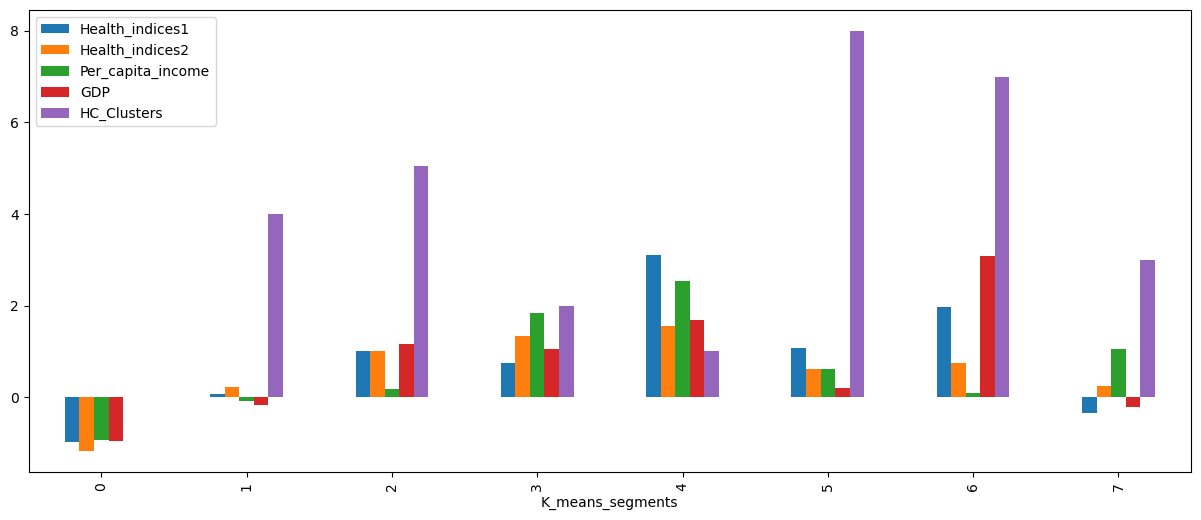

In [371]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='HC_segments'>

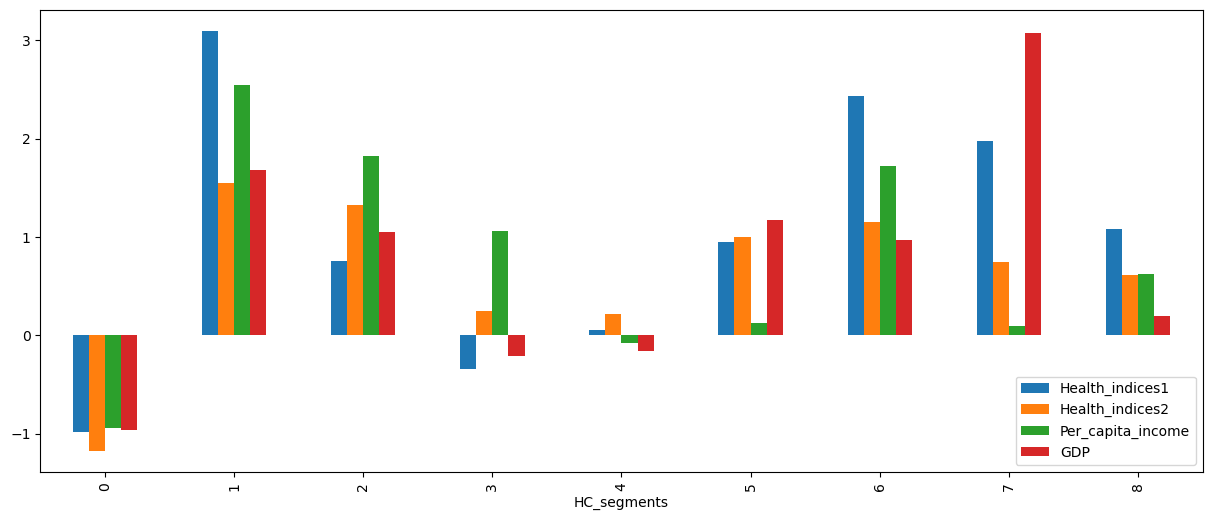

In [372]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

**Observations**
K-means - These summaries provide a high-level characterization of each cluster's health and economic conditions, highlighting potential opportunities for trade and investment within and between clusters.
Hierarchical Clustering - These summaries provide a high-level characterization of each cluster's health and economic conditions, highlighting potential opportunities for trade and investment within and between clusters.

Based on the silhouette scores, the optimal number of clusters is 7, as it has the highest score and an elbow in the curve.

Cluster profiles:

Low health and income, moderate GDP
High health and income, moderate GDP
High health, low income, low GDP
Low health, high income, high GDP
Moderate health and income, high GDP
High health, moderate income, high GDP
Low health, moderate income, low GDP
Priority actions:
Cluster 1: Maintain current health and income levels, invest in GDP growth
Cluster 2: Maintain current health and GDP levels, invest in income growth
Cluster 3: Prioritize health and income growth, improve GDP
Cluster 4: Prioritize income growth, maintain health and GDP levels
Cluster 5: Maintain current health and income levels, invest in GDP growth
Cluster 6: Prioritize income growth, maintain health and GDP levels
Cluster 7: Prioritize health and income growth, improve GDP.


**Let's create some plots on the original data to understand the customer distribution among the clusters.**

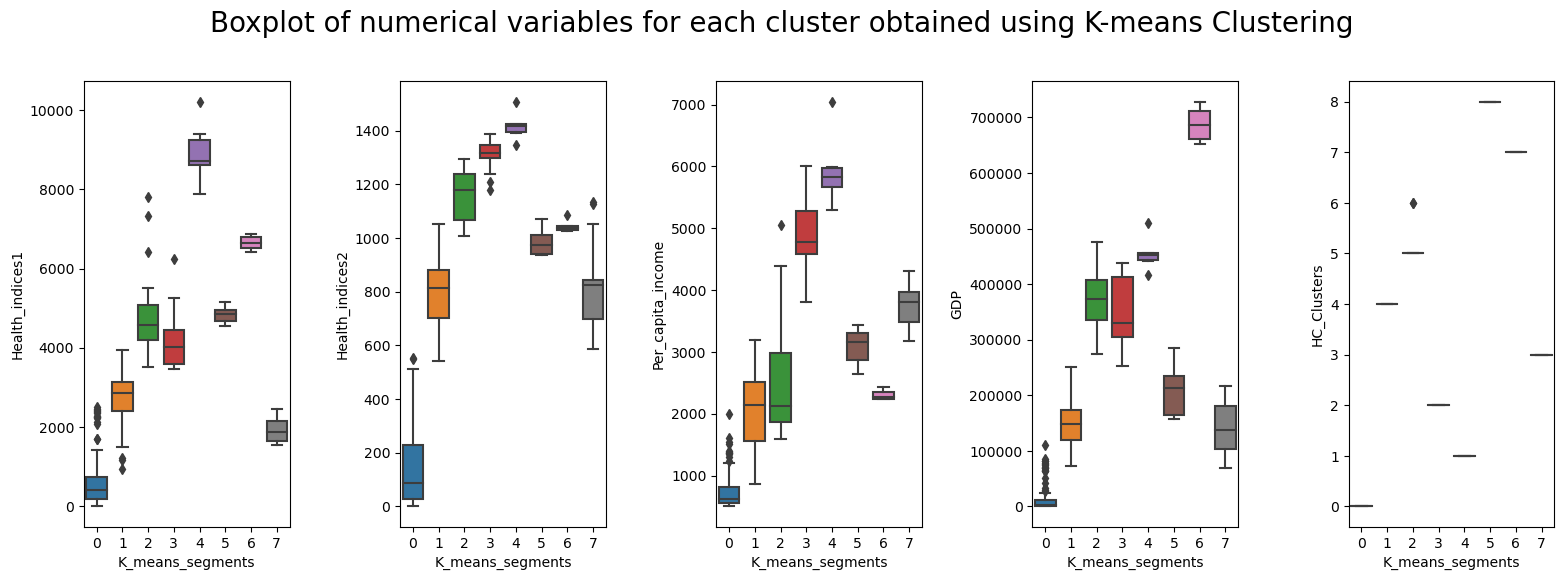

In [373]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

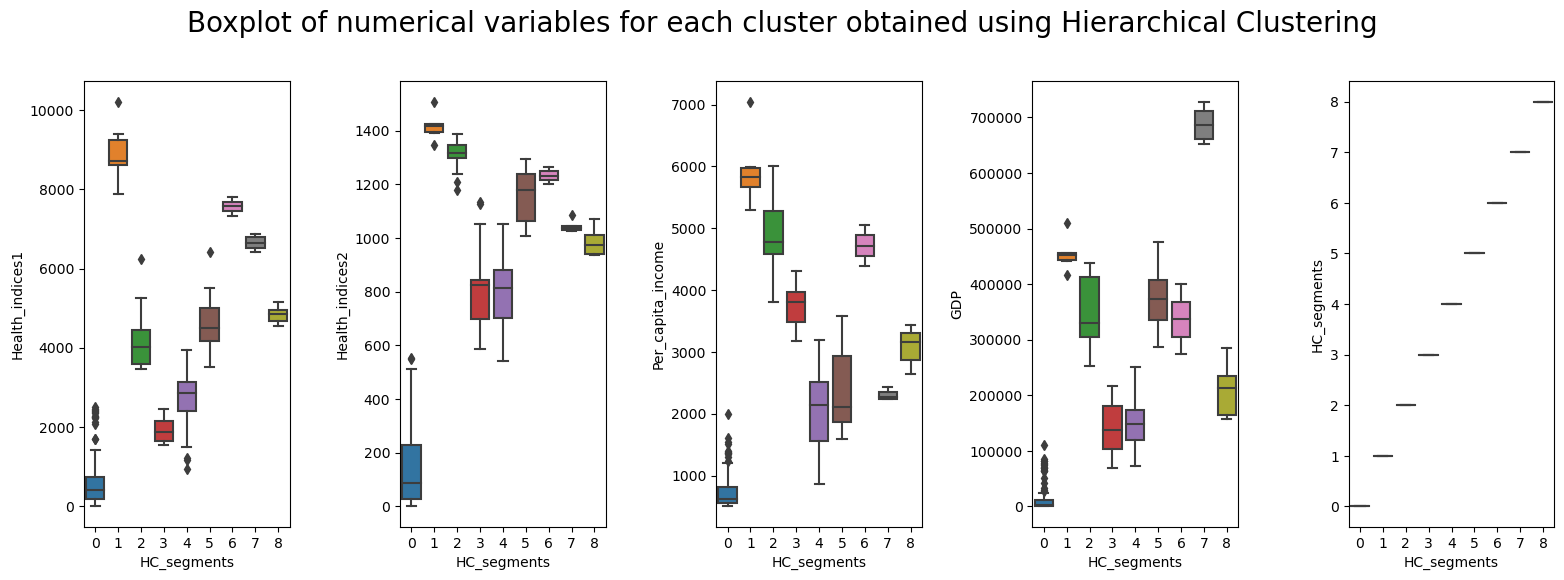

In [374]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

### Cluster Comparison

**Observations**

•	Cluster 0 in K-means and HC segments have the lowest values for Health_indices1, Health_indices2, Per_capita_income, and GDP. This suggests that this cluster represents states with the poorest health and economic conditions.
•	Cluster 5 in K-means segments and Cluster 6 in HC segments have the highest values for Health_indices1 and Per_capita_income, suggesting that these clusters represent states with the best health and economic conditions.
•	Cluster 2 in K-means segments and Cluster 3 in HC segments have moderate values for Health_indices1 and Health_indices2, but relatively low values for Per_capita_income and GDP. This suggests that these clusters represent states with middling health and economic conditions


### Insights
•	For states in Cluster 0, the government should prioritize interventions to improve health and economic outcomes. This may include increasing funding for healthcare, improving access to healthcare services, and implementing policies to promote economic growth.
•	For states in Cluster 5 and Cluster 6, the government should continue to support policies and programs that have contributed to their strong health and economic outcomes. This may include maintaining funding for healthcare, promoting economic development, and investing in education and workforce development.
•	For states in Cluster 2 and Cluster 3, the government should focus on targeted interventions to improve health and economic outcomes. This may include investing in infrastructure, promoting entrepreneurship and small business development, and improving access to healthcare services.
•	Across all clusters, the government should prioritize data-driven decision making and regularly monitor health and economic indicators to track progress and adjust policies as needed. This can help ensure that interventions are effective and that resources are being used efficiently.
•	The government should also consider identifying best practices and success stories from states in Cluster 5 and Cluster 6 and sharing them with states in other clusters to help accelerate progress and improve health and economic outcomes more broadly.




### Business Recommendations

some short business recommendations based on the given data and analysis:
Prioritize interventions for low-performing health system areas and implement targeted economic policies for health clusters.
Monitor progress and adjust policies, identify best practices and success stories, and allocate resources more effectively.
Inform public awareness campaigns, encourage private sector investment, foster cross-cluster collaboration, and regularly review and update the clustering approach.


# PCA

## Problem Statement

### Context

The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.


### Objective

Apply Principal Component Analysis (PCA) on the 'Hair Salon.csv' dataset, which encompasses various variables related to a salon chain's market segmentation. The goal is to analyze and interpret the principal components


###  Data Description

1. ProdQual: Product Quality
2. Ecom: E-Commerce
3. TechSup: Technical Support
4. CompRes: Complaint Resolution
5. Advertising: Advertising
6. ProdLine: Product Line
7. SalesFImage: Salesforce Image
8. ComPricing: Competitive Pricing
9. WartyClaim: Warranty & Claims
10. OrdBilling: Order & Billing
11. DelSpeed: Delivery Speed
12. Satisfaction: Customer Satisfaction

## Loading the dataset

In [320]:
data = pd.read_csv("C:/Users/mechs/OneDrive/Desktop/DM_EXTENDED PROJECT/Hair Salon.csv")    ## Complete the code to read the dataset

In [321]:
data.head()               ## Complete the code to check the head

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [322]:
data.drop(['ID','Satisfaction'],axis=1, inplace = True)     ## Complete the code to drop the ID and Satisfaction columns

## Exploratory Data Analysis

### Univariate Analysis

#### `ProdQual`

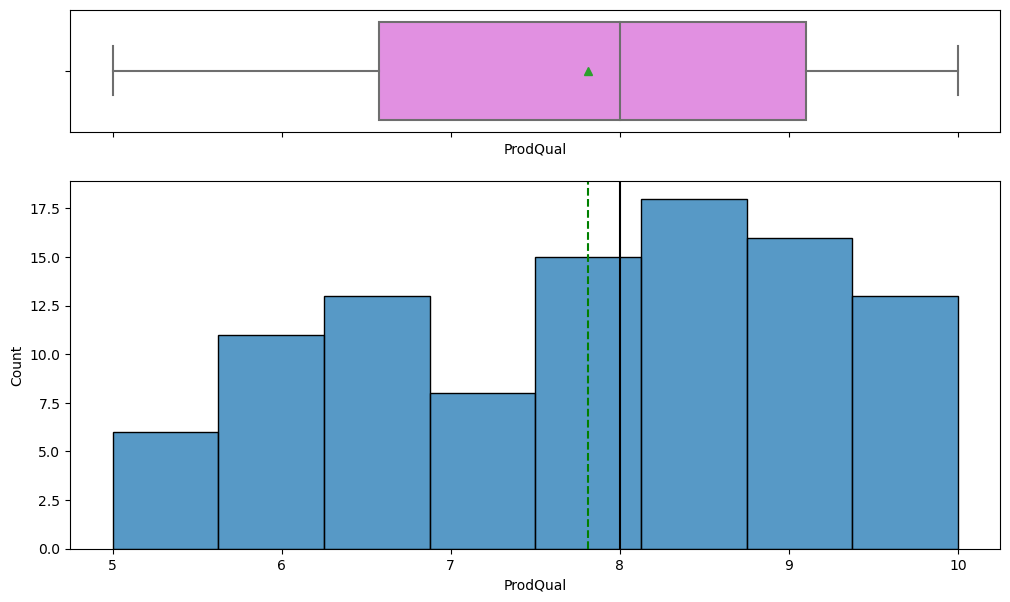

In [323]:
histogram_boxplot(data, 'ProdQual', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdQual

#### `Ecom`

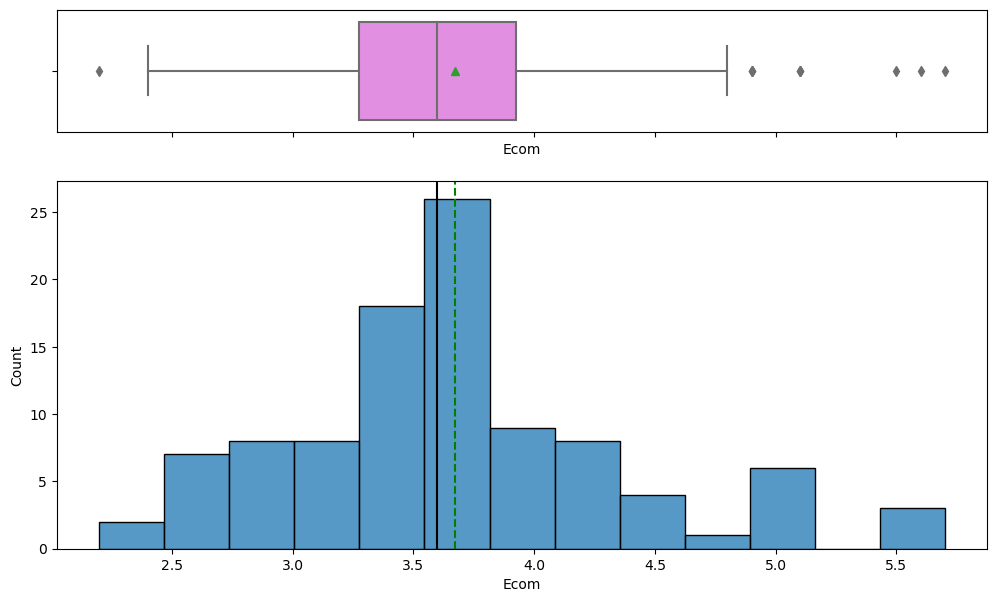

In [324]:
histogram_boxplot(data, 'Ecom', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Ecom

#### `TechSup`

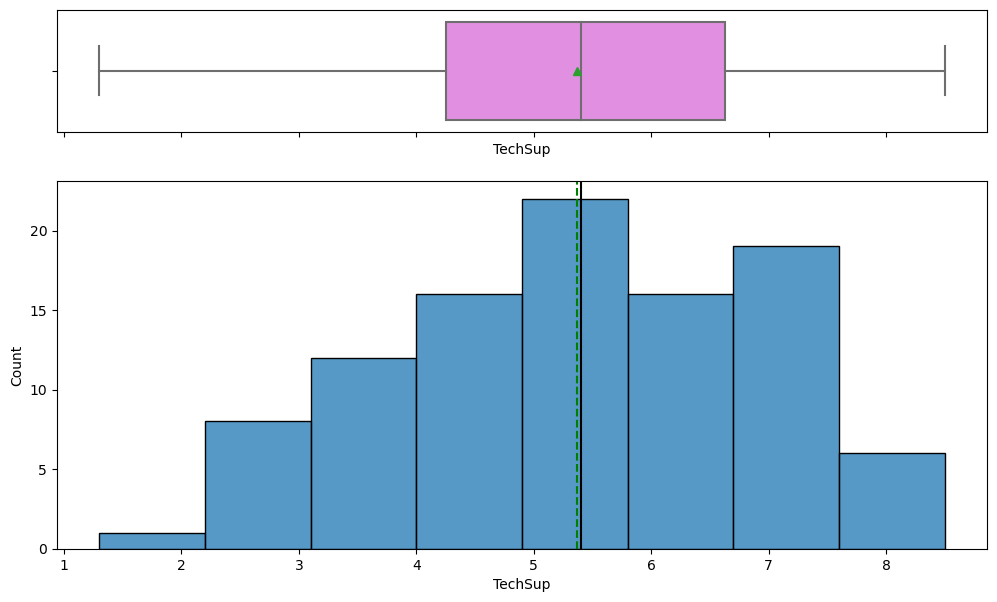

In [325]:
histogram_boxplot(data, 'TechSup', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for TechSup

#### `CompRes`

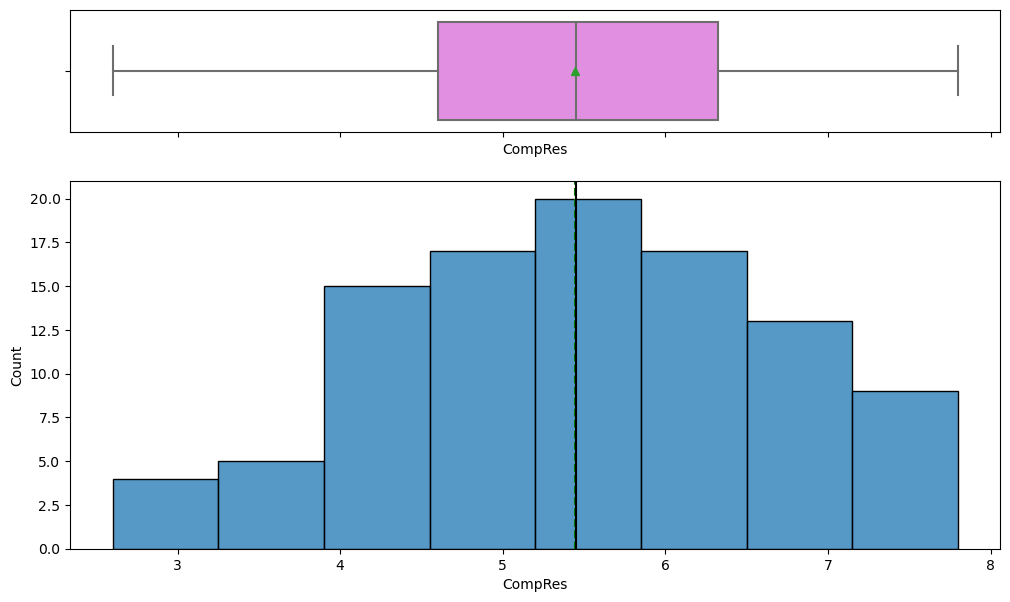

In [326]:
histogram_boxplot(data, 'CompRes', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for CompRes

#### `Advertising`

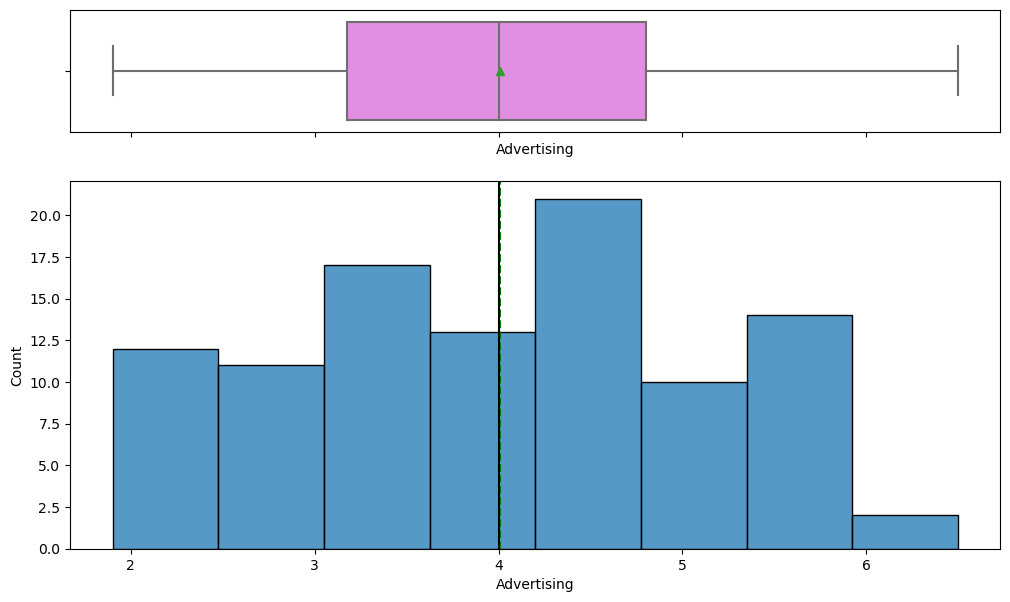

In [327]:
histogram_boxplot(data, 'Advertising', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Advertising

#### `ProdLine`

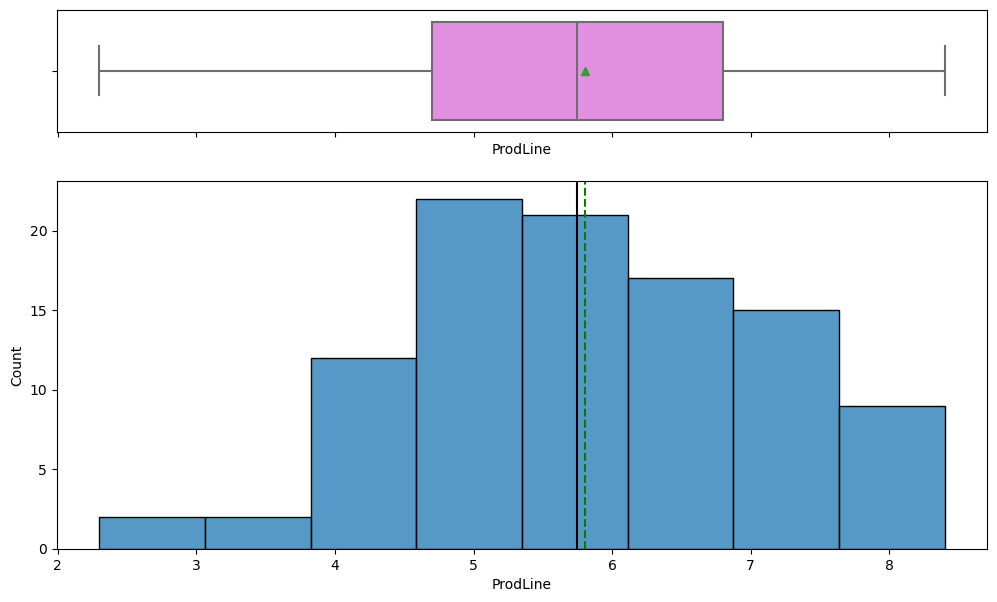

In [328]:
histogram_boxplot(data, 'ProdLine', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdLine

#### `SalesFImage`

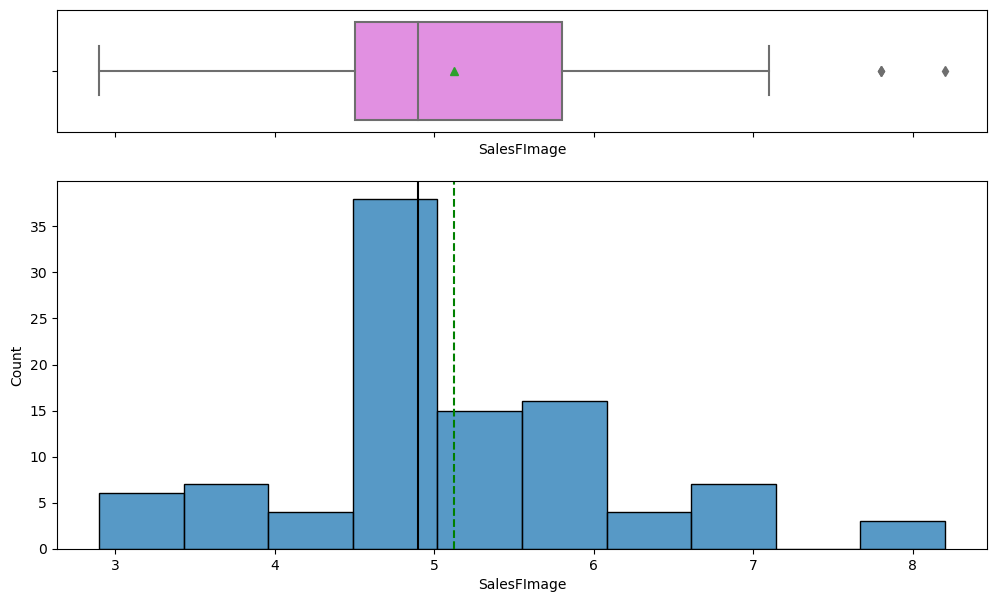

In [329]:
histogram_boxplot(data, 'SalesFImage', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for SalesFImage

#### `ComPricing`

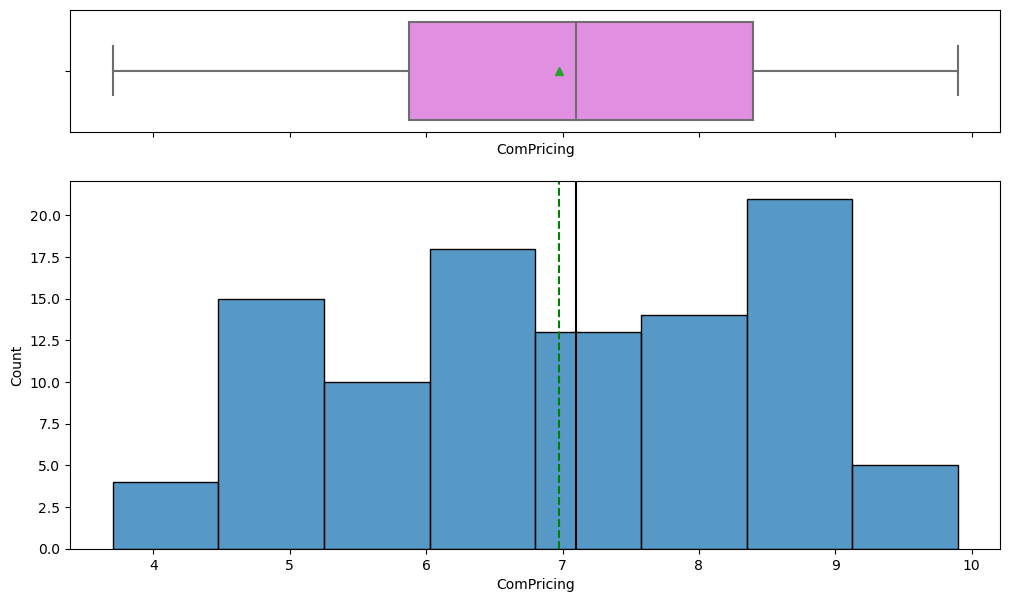

In [330]:
histogram_boxplot(data, 'ComPricing', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ComPricing

#### `WartyClaim`

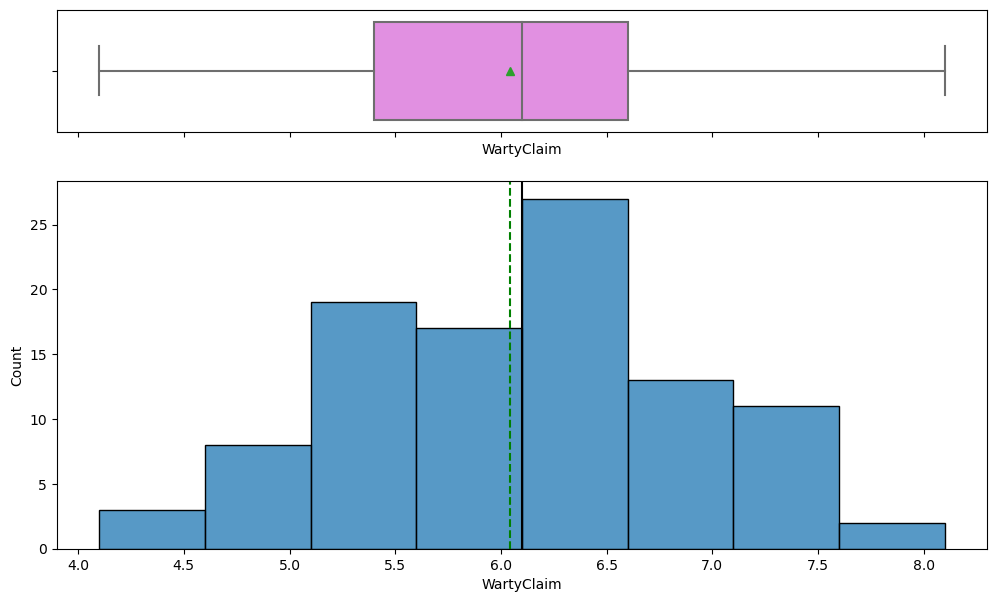

In [331]:
histogram_boxplot(data, 'WartyClaim', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for WartyClaim

#### `OrdBilling`

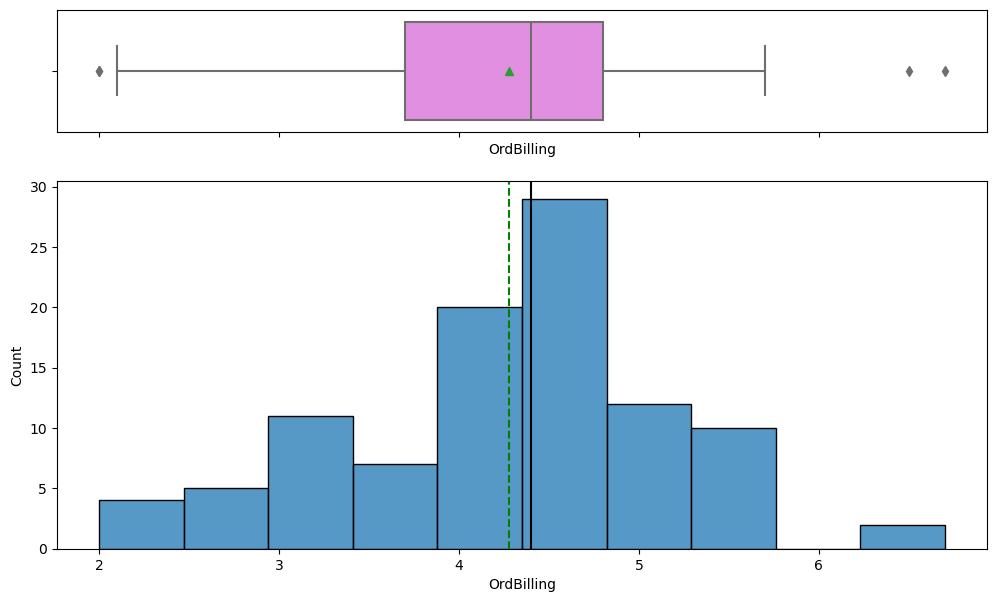

In [332]:
histogram_boxplot(data, 'OrdBilling', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for OrdBilling

#### `DelSpeed`

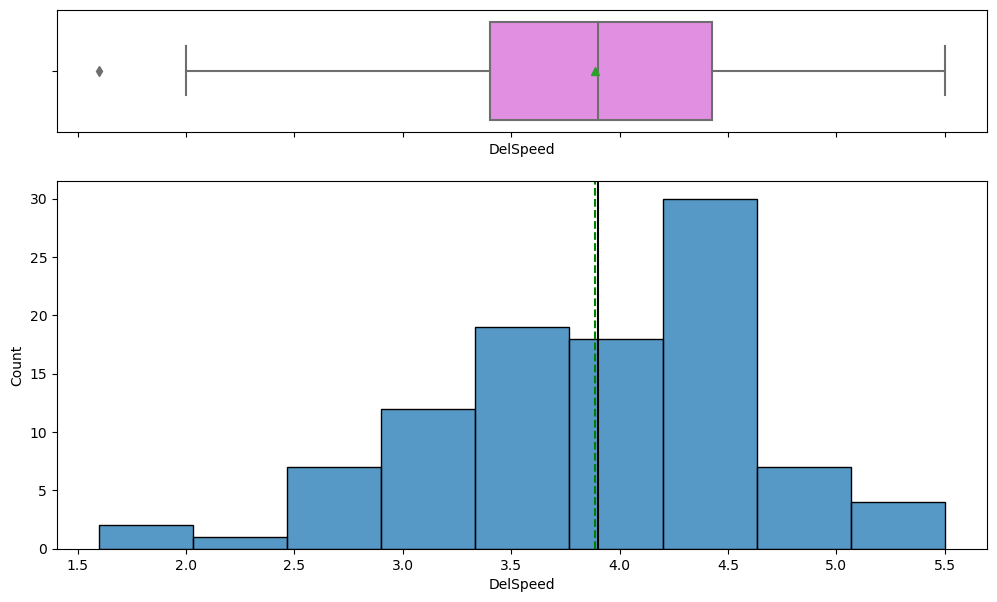

In [333]:
histogram_boxplot(data, 'DelSpeed', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for DelSpeed

### Bivariate Analysis

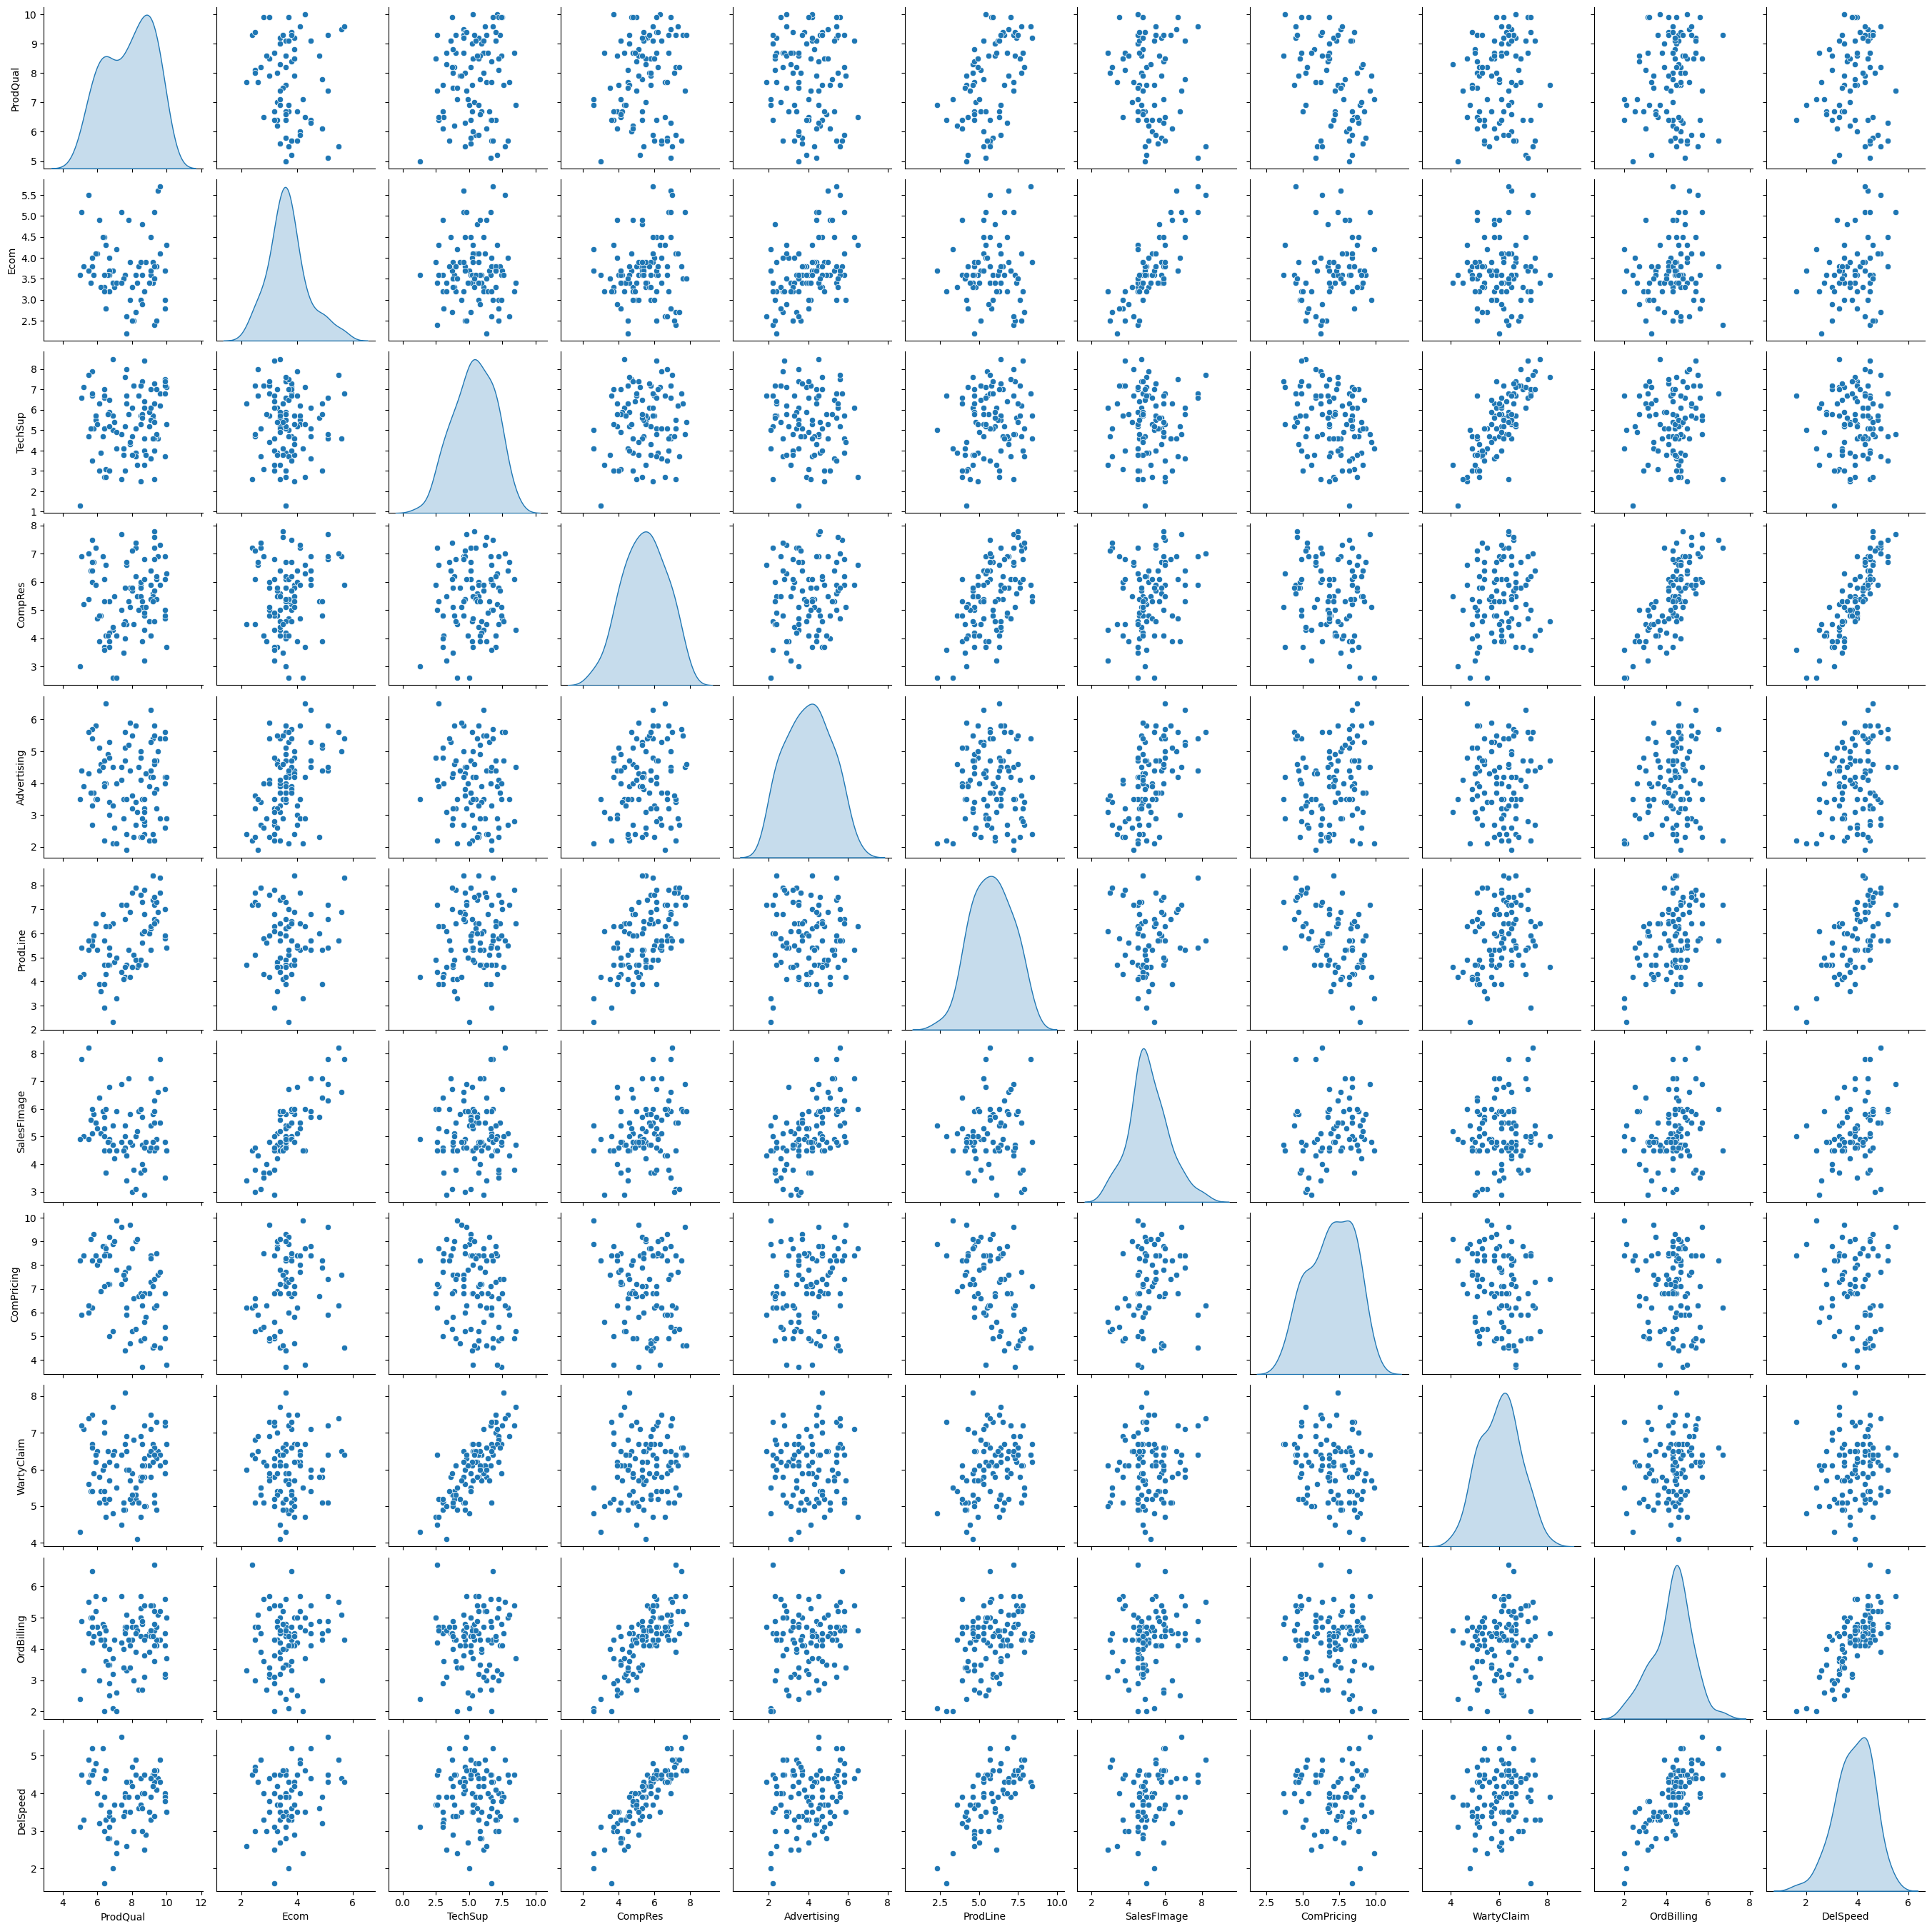

In [334]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

## Data Preprocessing

In [335]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [336]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Checking the outliers after scaling

**Use the same above code (which is used in univariate analysis) to check the outliers and add the observations.**

## Step 1- Create the covariance Matrix

In [337]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)                       ## Complete the code to apply PCA
df_pca = pca.fit_transform(subset_scaled_df)

In [338]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=subset_scaled_df.columns,index=subset_scaled_df.columns) #cov matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.01,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.11,0.03
Ecom,-0.14,1.01,0.00,0.14,0.43,-0.05,0.80,0.23,0.05,0.16,0.19
TechSup,0.10,0.00,1.01,0.10,-0.06,0.19,0.02,-0.27,0.81,0.08,0.03
CompRes,0.11,0.14,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.76,0.87
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28
ProdLine,0.48,-0.05,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61
SalesFImage,-0.15,0.80,0.02,0.23,0.55,-0.06,1.01,0.27,0.11,0.20,0.27
ComPricing,-0.41,0.23,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.12,-0.07
WartyClaim,0.09,0.05,0.81,0.14,0.01,0.28,0.11,-0.25,1.01,0.20,0.11
OrdBilling,0.11,0.16,0.08,0.76,0.19,0.43,0.20,-0.12,0.20,1.01,0.76


## Step 2- Get eigen values and eigen vector

In [339]:
eigenvec=pca.components_                                      ## Complete the code to apply PCA components
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[-0.13 -0.17 -0.16 -0.47 -0.18 -0.39 -0.2   0.15 -0.21 -0.44 -0.47]
 [-0.31  0.45 -0.23  0.02  0.36 -0.28  0.47  0.41 -0.19  0.03  0.07]
 [ 0.06 -0.24 -0.61  0.21 -0.09  0.12 -0.24  0.05 -0.6   0.17  0.23]
 [ 0.64  0.27 -0.19 -0.21  0.32  0.2   0.22 -0.33 -0.19 -0.24 -0.2 ]
 [ 0.23  0.42 -0.02  0.03 -0.8   0.12  0.2   0.25 -0.03  0.03 -0.04]
 [-0.56  0.26 -0.11 -0.03 -0.2   0.1   0.1  -0.71 -0.14 -0.12  0.03]
 [ 0.19  0.06 -0.02 -0.01 -0.06 -0.61  0.   -0.31 -0.03  0.66 -0.23]
 [ 0.14 -0.12  0.46  0.51 -0.05 -0.33  0.17 -0.1  -0.44 -0.37  0.07]
 [ 0.03 -0.54 -0.36  0.09 -0.15 -0.08  0.64 -0.09  0.32 -0.1  -0.02]
 [ 0.07  0.28 -0.39  0.53  0.04 -0.23 -0.35 -0.05  0.44 -0.3  -0.12]
 [ 0.18  0.06 -0.05 -0.36 -0.08 -0.39 -0.08 -0.1   0.13 -0.19  0.78]]


In [340]:
eigenvalues=pca.explained_variance_                                   ## Complete the code to apply PCA Explained Variance
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.46 2.58 1.71 1.1  0.62 0.56 0.41 0.25 0.21 0.13 0.1 ]


In [341]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [342]:
var_exp

array([31., 23., 15., 10.,  6.,  5.,  4.,  2.,  2.,  1.,  1.])

## Step 3 View Scree Plot to identify the number of components to be built

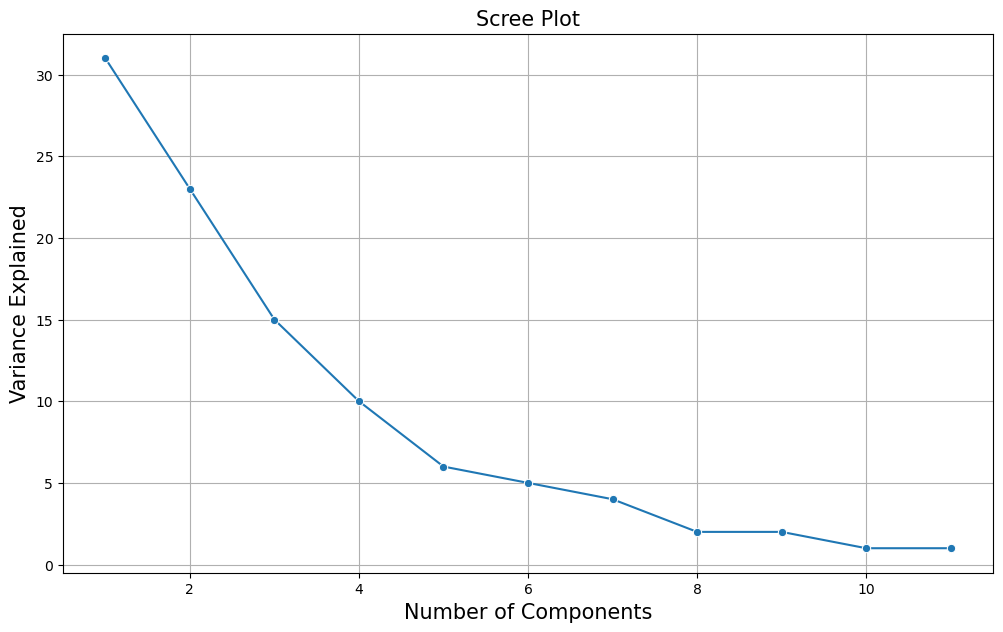

In [343]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

## Step 4 Apply PCA for the number of decided components to get the loadings and component output

In [344]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=123)        ## Complete the code to apply the appropriate PCA components from the above plot
df_pca = pca.fit_transform(subset_scaled_df)
df_pca.transpose()         # Component output

array([[ 0.0795508 , -1.10096634, -2.19706653,  1.56293289,  0.76757039,
         2.90862177,  5.29319132,  1.47659077, -0.61394761, -0.42366008,
         0.57625231,  1.86757037, -2.66029481, -1.15437973, -1.98252867,
        -1.19534642, -0.6292106 , -1.94912563, -0.44065433, -1.18679105,
         1.32903312, -3.07501457, -1.22862294, -1.9521566 ,  0.27711435,
        -0.33863508, -1.7647172 ,  1.0351017 , -1.29479142,  1.66262708,
         0.14460849,  2.1146274 ,  1.06970726, -0.10940809,  1.80536022,
         2.1224852 ,  0.62205111, -2.57411754, -0.34496698,  1.21539637,
         1.25487586,  0.16793078, -1.82095895, -2.33269255, -0.87328888,
        -1.65347263, -1.03184895, -3.12115015, -1.07236222, -0.79767523,
         1.98945764, -1.15121892, -1.07789784,  1.16797753,  0.52852266,
        -0.3768932 , -3.50943905, -1.28569623,  0.57436837, -1.10762365,
        -2.11898365,  1.19627748,  1.22409809,  2.78237859,  1.83048999,
        -1.25224924, -1.39907113,  0.0918897 ,  2.5

In [345]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(subset_scaled_df),index=['PC0','PC1'])
df_pca_loading.shape

(2, 11)

In [346]:
df_pca_loading = np.round(df_pca_loading,2)

In [347]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC0,-0.130000,-0.170000,-0.160000,-0.470000,-0.180000,-0.390000,-0.200000,0.150000,-0.210000,-0.440000,-0.470000
PC1,-0.310000,0.450000,-0.230000,0.020000,0.360000,-0.280000,0.470000,0.410000,-0.190000,0.030000,0.070000


In [348]:
# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=df_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 54.34% of the variance in the data.


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

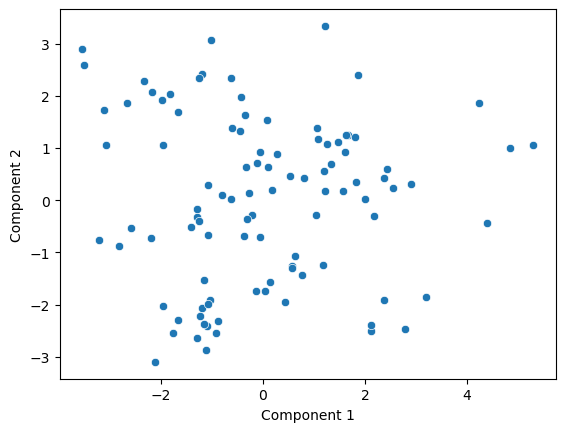

In [349]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

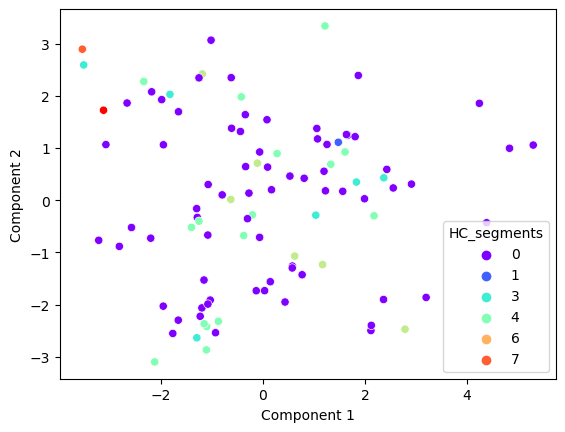

In [350]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)

In [351]:
# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_                            ## Complete the code to get the explained variance

# Interpretation of principal components
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Display results
print("Explained Variance Ratio:", explained_var_ratio)
print("Principal Component 1 Loadings:", pc1_loadings)
print("Principal Component 2 Loadings:", pc2_loadings)

Explained Variance Ratio: [0.31154285 0.2318997 ]
Principal Component 1 Loadings: [-0.13378962 -0.16595278 -0.15769263 -0.47068359 -0.18373495 -0.38676517
 -0.2036696   0.15168864 -0.21293363 -0.43721774 -0.47308914]
Principal Component 2 Loadings: [-0.31349802  0.44650918 -0.23096734  0.01944394  0.36366471 -0.28478056
  0.47069599  0.4134565  -0.19167191  0.02639905  0.07305172]


In [352]:
# Cumulative explained variance ratio
cumulative_explained_var = np.cumsum(explained_var_ratio)           ## Complete the code to get the cumulative explained variance

# Display results
print("Cumulative Explained Variance:", cumulative_explained_var)

Cumulative Explained Variance: [0.31154285 0.54344255]


In [353]:
# Applying K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=1)
labels_original = kmeans_original.fit_predict(k_means_df)

In [354]:
# Applying K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=1)
labels_pca = kmeans_pca.fit_predict(df_pca)

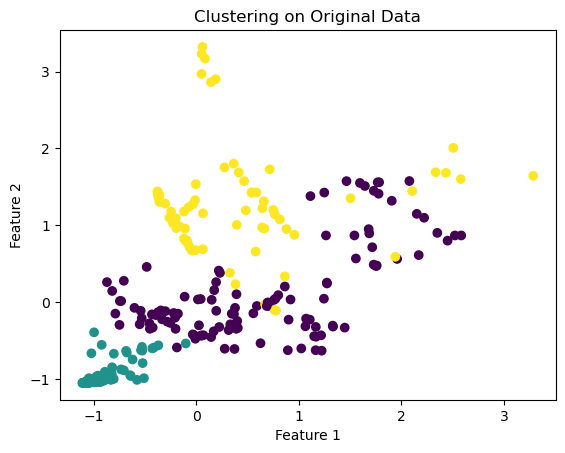

In [355]:
plt.scatter(k_means_df['Per_capita_income'], k_means_df['GDP'], c=labels_original, cmap='viridis')
plt.title('Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<AxesSubplot:title={'center':'Clustering on PCA Transformed Data'}, xlabel='Component 1', ylabel='Component 2'>

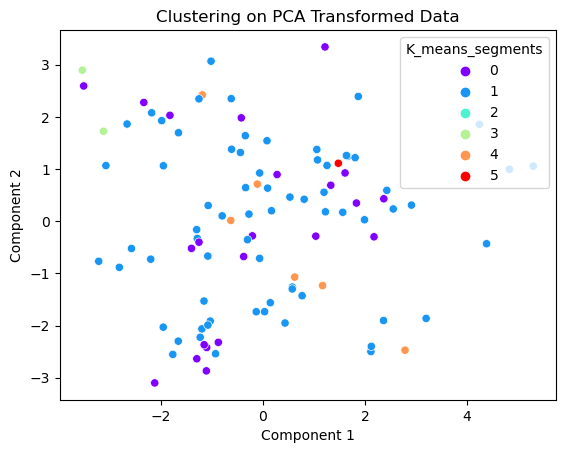

In [356]:
plt.title('Clustering on PCA Transformed Data')
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["K_means_segments"],
    palette="rainbow",
)

15.	Business implication of using the Principal Component Analysis
•	The first principal component (PC1) has a strong positive loading for Advertising and SalesFImage, and a strong negative loading for ProdQual, TechSup, CompRes, ProdLine, WartyClaim, OrdBilling, and DelSpeed. This suggests that PC1 captures the variation in the data related to the quality and reliability of the products and services offered by the salon chain, as well as the effectiveness of their advertising and sales image.
•	The second principal component (PC2) has a strong positive loading for Ecom and ComPricing, and a strong negative loading for ProdQual and PC1. This suggests that PC2 captures the variation in the data related to the salon chain's e-commerce capabilities and pricing strategy, as well as the quality of their products.
•	The negative loading for ProdQual on both PC1 and PC2 suggests that there is a negative correlation between product quality and both e-commerce capabilities and pricing strategy. This could indicate that the salon chain may be sacrificing product quality in order to focus on e-commerce and competitive pricing.
•	The negative loading for TechSup and CompRes on PC1 suggests that there is a negative correlation between technical support and complaint resolution and the overall quality and reliability of the products and services offered by the salon chain. This could indicate that the salon chain may need to improve their technical support and complaint resolution processes in order to enhance the overall customer experience.
•	Overall, the PCA results suggest that the salon chain's product quality, advertising and sales image, e-commerce capabilities, and pricing strategy are the key drivers of variation in the data. The negative correlation between product quality and e-commerce capabilities and pricing strategy suggests that the salon chain may need to balance their focus on these areas in order to improve the overall customer experience.


